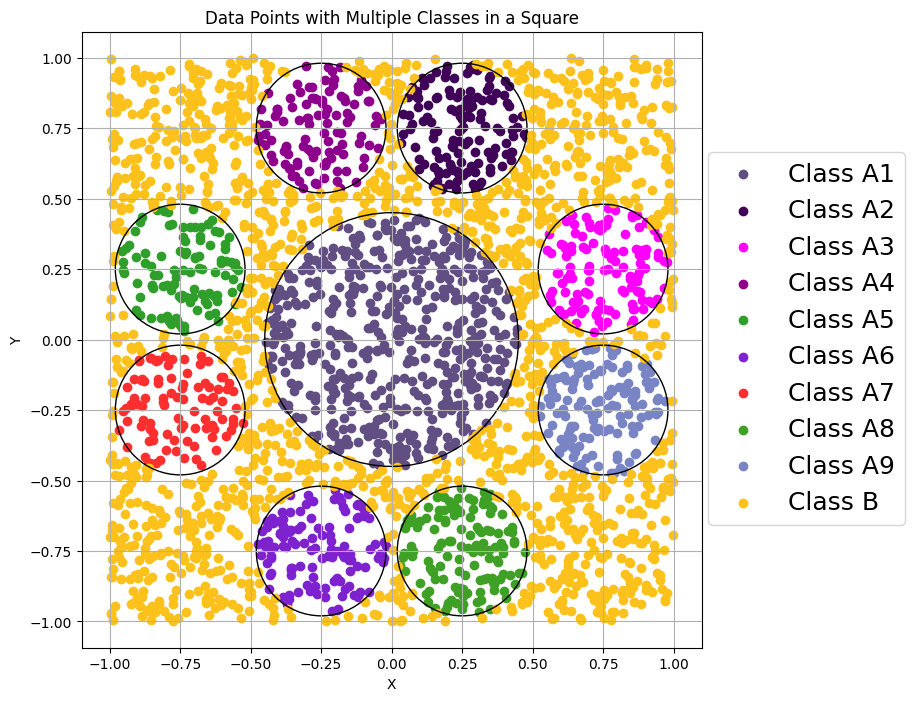

In [176]:
import numpy as np
import matplotlib.pyplot as plt

def generate_classified_data(num_points):
    # 正方形范围内生成随机点
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)

    # 定义圆的圆心和半径
    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),(-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8

    # # 初始化类别标签
    classes = ['B'] * num_points  # 默认为B类
    #
    # 检查每个点所属的类别
    for i, center in enumerate(circle_centers):
        distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
        inside_circle = distance <= radii[i]
        classes = np.where(inside_circle, f'A{i+1}', classes)

    return x, y, classes

# 生成数据
num_points = 3000
x, y, classes = generate_classified_data(num_points)

color_list = ['#614e82','#3f0457','#ff00ff','#8c008c','#2f9e2b','#7e21ce','#ff2f30','#3ea024','#7984c4']
# 可视化数据
plt.figure(figsize=(8, 8))
for i in range(1, 10):
    plt.scatter(x[classes == f'A{i}'], y[classes == f'A{i}'],c=color_list[i-1], label=f'Class A{i}')
plt.scatter(x[classes == 'B'], y[classes == 'B'], color='#fcc11b', label='Class B')

# 画圆
circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),
                  (-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
radii = [0.45] + [0.23] * 8
for center, radius in zip(circle_centers, radii):
    circle = plt.Circle(center, radius, color='black', fill=False, linewidth=1)
    plt.gca().add_artist(circle)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points with Multiple Classes in a Square')
plt.legend(loc=(1.01,0.2),fontsize=18)
plt.grid(True)
plt.axis('equal')
plt.show()


In [15]:
print(2-3.14159*0.23*0.23*8 )
print(0.67/3.14159)
print(0.21)
import math

# 计算根号0.21
result = math.sqrt(0.21)
print(result)

0.670479112
0.2132678038827473
0.21
0.458257569495584


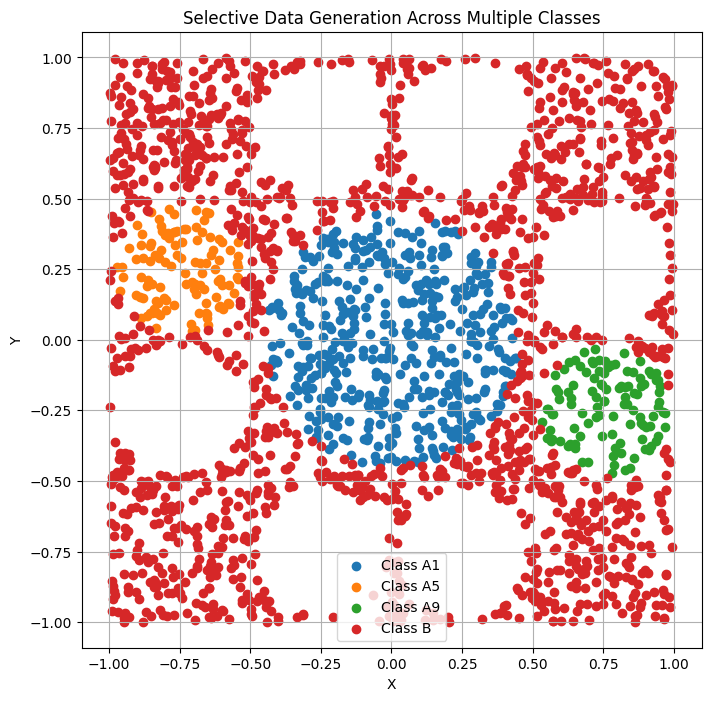

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_classified_data(num_points, active_classes):
    # 正方形范围内生成随机点
    x = np.random.uniform(-1, 1, num_points)
    y = np.random.uniform(-1, 1, num_points)

    # 定义圆的圆心和半径
    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),
                      (-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8

    # 初始化类别标签
    classes = ['None'] * num_points  # 默认无类别

    # 检查每个点所属的类别
    for i, center in enumerate(circle_centers):
        distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
        inside_circle = distance <= radii[i]
        class_label = f'A{i+1}'
        classes = np.where(inside_circle, class_label, classes)

    # 判断点是否不在任何圆形内，并且'B'是活动类别
    is_outside_all_circles = np.array(classes) == 'None'
    classes[is_outside_all_circles] = 'B' if 'B' in active_classes else 'None'

    # 只保留活动类别的数据点
    mask = np.isin(classes, active_classes)
    x_final = x[mask]
    y_final = y[mask]
    classes_final = classes[mask]

    return x_final, y_final, classes_final

# 用户指定活动类别
active_classes = ['A1', 'A5', 'A9', 'B']  # 示例：只生成A1, A5, A9和B类数据

# 生成数据
num_points = 3000
x, y, classes = generate_classified_data(num_points, active_classes)

# 可视化数据
plt.figure(figsize=(8, 8))
for cl in np.unique(classes):
    plt.scatter(x[classes == cl], y[classes == cl], label=f'Class {cl}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Selective Data Generation Across Multiple Classes')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


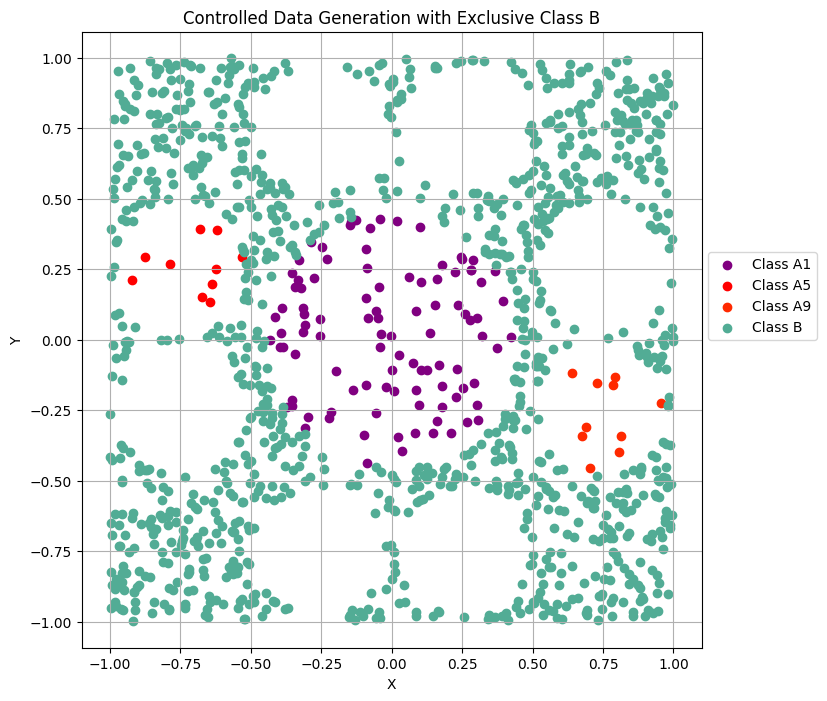

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_class_data(center, radius, num_points):
    """生成位于特定圆内的数据点"""
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    r = radius * np.sqrt(np.random.uniform(0, 1, num_points))
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)
    return x, y

def generate_classified_data(points_per_class):
    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),
                      (-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8
    labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

    # 初始化列表用于收集数据点和标签
    x_all, y_all, class_all = [], [], []

    # 生成每个圆内的数据点
    for i, (center, radius) in enumerate(zip(circle_centers, radii)):
        if labels[i] in points_per_class:
            num_points = points_per_class[labels[i]]
            x, y = generate_class_data(center, radius, num_points)
            x_all.extend(x)
            y_all.extend(y)
            class_all.extend([labels[i]] * num_points)

    # 生成B类数据，确保不覆盖任何A类区域
    if 'B' in points_per_class:
        num_points_b = points_per_class['B']
        count = 0
        while count < num_points_b:
            x_b, y_b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
            # 检查该点是否在任何圆内
            if all(np.sqrt((x_b - cx)**2 + (y_b - cy)**2) > r for cx, cy, r in zip([c[0] for c in circle_centers], [c[1] for c in circle_centers], radii)):
                x_all.append(x_b)
                y_all.append(y_b)
                class_all.append('B')
                count += 1

    return np.array(x_all), np.array(y_all), np.array(class_all)

# 指定每个类别的数据点数量
class_label = {}
points_per_class = {'A1': 100, 'A5': 10, 'A9': 10, 'B': 1100}
color_list_blue=['#0000FF', '#0E00F0', '#1C00E2', '#2A00D4', '#3800C6', '#4700B8', '#5500AA', '#63009C', '#71008E', '#800080']
color_list_yellow = ['#FFFF00', '#E2F000', '#C6E200', '#AAD400', '#8DC600', '#71B800', '#55AA00', '#389C00', '#1C8E00','#008000']
color_list_lightBlue =['#389C63', '#40A173', '#49A784', '#52AC95', '#5BB2A6', '#63B7B6', '#6CBDC7', '#75C2D8', '#7EC8E9','#87CEFA']
color_list_lightP = ['#42C3ED', '#56BFEC', '#6BBBEB', '#7FB7EA', '#94B3E9', '#A8AFE9', '#BDABE8', '#D1A7E7', '#E6A3E6', '#FB9FE6']
color_list_lightRed= ['#FC9333', '#FB8937', '#FA803B', '#FA773F', '#F96D43', '#F86447', '#F85B4B', '#F7514F', '#F64853', '#F63F57']
color_list =['#800080','#FF0000', '#FF2900', '#52AC95', '#FF7B00', '#FFA500', '#FFA500', '#FFAB32', '#FFB265', '#FFB998',
 '#FFC0CB'] # ['#800080','#D1A7E7','#FA773F','#52AC95']
# 生成数据
x, y, classes = generate_classified_data(points_per_class)

# 可视化数据
plt.figure(figsize=(8, 8))
for i,cl in enumerate(np.unique(classes)):
    plt.scatter(x[classes == cl], y[classes == cl],color = color_list[i] ,label=f'Class {cl}', alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Controlled Data Generation with Exclusive Class B')
plt.legend(loc=(1.01,0.5))
plt.grid(True)
plt.axis('equal')
plt.show()


D:\ProgramData\Anaconda3\envs\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

          A1       0.99      0.99      0.99        85
          A5       0.94      0.97      0.95       108
          A9       0.90      1.00      0.94        77
           B       0.99      0.95      0.97       330

    accuracy                           0.96       600
   macro avg       0.95      0.98      0.96       600
weighted avg       0.97      0.96      0.97       600

[[ 84   0   0   1]
 [  0 105   0   3]
 [  0   0  77   0]
 [  1   7   9 313]]


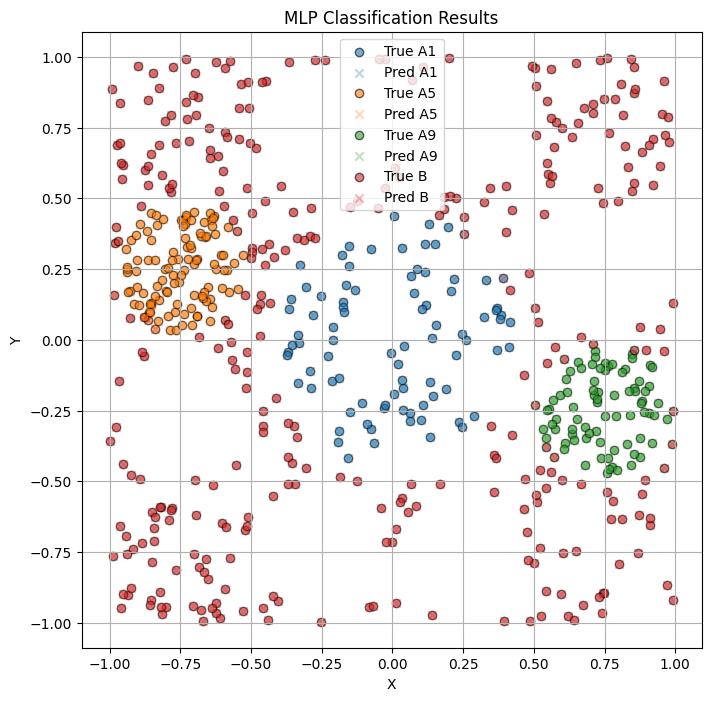

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.colors as mcolors
# 指定每个类别的数据点数量
points_per_class = {'A1': 300, 'A5': 300, 'A9': 300, 'B': 1100}

# 生成数据
x, y, classes = generate_classified_data(points_per_class)

# 将标签转换为数字
class_labels = np.unique(classes)
class_dict = {label: index for index, label in enumerate(class_labels)}
y_numeric = np.array([class_dict[label] for label in classes])

# 划分训练集和测试集
X = np.column_stack((x, y))
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)

# 训练MLP分类器
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# 预测并评估
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred, target_names=class_labels))
print(confusion_matrix(y_test, y_pred))

# 可视化分类结果
plt.figure(figsize=(8, 8))
colors = list(mcolors.TABLEAU_COLORS.values())
for i, label in enumerate(class_labels):
    plt.scatter(X_test[y_test == i][:, 0], X_test[y_test == i][:, 1], label=f'True {label}', color=colors[i], alpha=0.6, edgecolor='k', marker='o')
    plt.scatter(X_test[y_pred == i][:, 0], X_test[y_pred == i][:, 1], label=f'Pred {label}', color=colors[i], alpha=0.3, marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('MLP Classification Results')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Epoch [1/1000], Loss: 1.4553, Val Loss: 1.4340
Epoch [2/1000], Loss: 1.4387, Val Loss: 1.4175
Epoch [3/1000], Loss: 1.4223, Val Loss: 1.4013
Epoch [4/1000], Loss: 1.4062, Val Loss: 1.3854
Epoch [5/1000], Loss: 1.3905, Val Loss: 1.3698
Epoch [6/1000], Loss: 1.3750, Val Loss: 1.3546
Epoch [7/1000], Loss: 1.3599, Val Loss: 1.3396
Epoch [8/1000], Loss: 1.3451, Val Loss: 1.3250
Epoch [9/1000], Loss: 1.3306, Val Loss: 1.3108
Epoch [10/1000], Loss: 1.3165, Val Loss: 1.2968
Epoch [11/1000], Loss: 1.3027, Val Loss: 1.2833
Epoch [12/1000], Loss: 1.2893, Val Loss: 1.2700
Epoch [13/1000], Loss: 1.2762, Val Loss: 1.2571
Epoch [14/1000], Loss: 1.2634, Val Loss: 1.2446
Epoch [15/1000], Loss: 1.2510, Val Loss: 1.2324
Epoch [16/1000], Loss: 1.2390, Val Loss: 1.2206
Epoch [17/1000], Loss: 1.2273, Val Loss: 1.2091
Epoch [18/1000], Loss: 1.2159, Val Loss: 1.1980
Epoch [19/1000], Loss: 1.2050, Val Loss: 1.1872
Epoch [20/1000], Loss: 1.1943, Val Loss: 1.1767
Epoch [21/1000], Loss: 1.1840, Val Loss: 1.1666
E

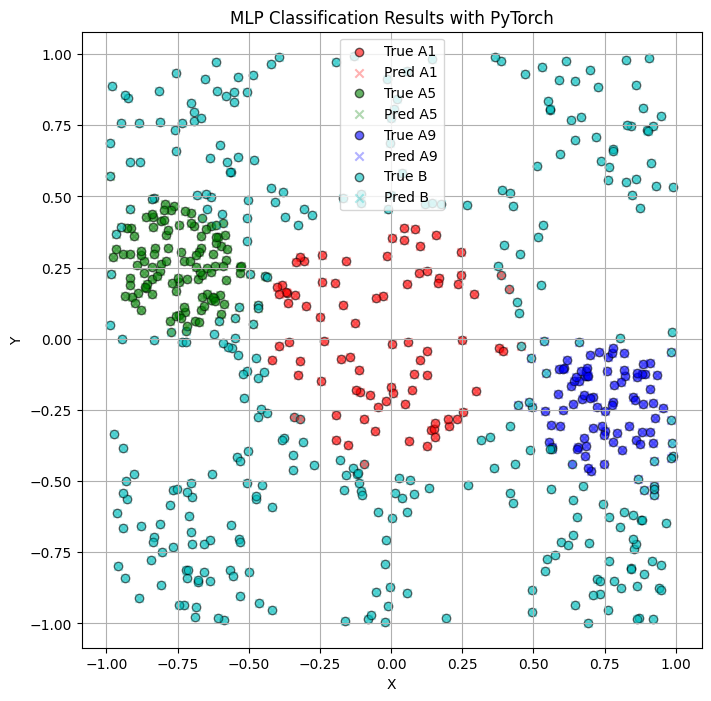

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 数据生成函数
def generate_class_data(center, radius, num_points):
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    r = radius * np.sqrt(np.random.uniform(0, 1, num_points))
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)
    return x, y

def generate_classified_data(points_per_class):
    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),
                      (-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8
    labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

    x_all, y_all, class_all = [], [], []

    for i, (center, radius) in enumerate(zip(circle_centers, radii)):
        if labels[i] in points_per_class:
            num_points = points_per_class[labels[i]]
            x, y = generate_class_data(center, radius, num_points)
            x_all.extend(x)
            y_all.extend(y)
            class_all.extend([labels[i]] * num_points)

    if 'B' in points_per_class:
        num_points_b = points_per_class['B']
        count = 0
        while count < num_points_b:
            x_b, y_b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
            if all(np.sqrt((x_b - cx)**2 + (y_b - cy)**2) > r for cx, cy, r in zip([c[0] for c in circle_centers], [c[1] for c in circle_centers], radii)):
                x_all.append(x_b)
                y_all.append(y_b)
                class_all.append('B')
                count += 1

    return np.array(x_all), np.array(y_all), np.array(class_all)

# 定义MLP模型
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 训练模型的函数
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# 数据准备
points_per_class = {'A1': 300, 'A5': 300, 'A9': 300, 'B': 1100}
x, y, classes = generate_classified_data(points_per_class)

class_labels = np.unique(classes)
class_dict = {label: index for index, label in enumerate(class_labels)}
y_numeric = np.array([class_dict[label] for label in classes])

X = np.column_stack((x, y))
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# 模型定义和训练
input_dim = 2
hidden_dim = 100
output_dim = len(class_labels)
num_epochs = 100
learning_rate = 0.001

model = MLP(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_model(model, criterion, optimizer, X_train, y_train, X_test, y_test, num_epochs)

# 模型评估
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    print(classification_report(y_test, predicted, target_names=class_labels))
    print(confusion_matrix(y_test, predicted))

# 可视化分类结果
plt.figure(figsize=(8, 8))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i, label in enumerate(class_labels):
    plt.scatter(X_test[y_test == i][:, 0], X_test[y_test == i][:, 1], label=f'True {label}', color=colors[i], alpha=0.6, edgecolor='k', marker='o')
    plt.scatter(X_test[predicted == i][:, 0], X_test[predicted == i][:, 1], label=f'Pred {label}', color=colors[i], alpha=0.3, marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('MLP Classification Results with PyTorch')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 数据生成函数
def generate_class_data(center, radius, num_points):
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    r = radius * np.sqrt(np.random.uniform(0, 1, num_points))
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)
    return x, y

def generate_classified_data(points_per_class):
    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),
                      (-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8
    labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

    x_all, y_all, class_all = [], [], []

    for i, (center, radius) in enumerate(zip(circle_centers, radii)):
        if labels[i] in points_per_class:
            num_points = points_per_class[labels[i]]
            x, y = generate_class_data(center, radius, num_points)
            x_all.extend(x)
            y_all.extend(y)
            class_all.extend([labels[i]] * num_points)

    if 'B' in points_per_class:
        num_points_b = points_per_class['B']
        count = 0
        while count < num_points_b:
            x_b, y_b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
            if all(np.sqrt((x_b - cx)**2 + (y_b - cy)**2) > r for cx, cy, r in zip([c[0] for c in circle_centers], [c[1] for c in circle_centers], radii)):
                x_all.append(x_b)
                y_all.append(y_b)
                class_all.append('B')
                count += 1

    return np.array(x_all), np.array(y_all), np.array(class_all)

# 定义MLP模型
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 训练模型的函数
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs, grid_data):
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        if (epoch + 1) % 300== 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
            visualize_model(model, grid_data, epoch + 1)

# 可视化分类结果的函数
def visualize_model(model, grid_data, epoch):
    model.eval()
    with torch.no_grad():
        grid_outputs = model(grid_data)
        _, grid_predicted = torch.max(grid_outputs, 1)
        grid_predicted = grid_predicted.reshape(250, 250)

    plt.figure(figsize=(8, 8))
    plt.imshow(grid_predicted, extent=(-1, 1, -1, 1), origin='lower', cmap='viridis', alpha=0.5)
    plt.colorbar()
    plt.title(f'Model Predictions at Epoch {epoch}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# 数据准备
points_per_class = {'A1': 300, 'A5': 300, 'A9': 300, 'B': 1100}
x, y, classes = generate_classified_data(points_per_class)

class_labels = np.unique(classes)
class_dict = {label: index for index, label in enumerate(class_labels)}
y_numeric = np.array([class_dict[label] for label in classes])

X = np.column_stack((x, y))
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# 创建网格数据
grid_x, grid_y = np.meshgrid(np.linspace(-1, 1, 250), np.linspace(-1, 1, 250))
grid_data = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_data = torch.tensor(grid_data, dtype=torch.float32)

# 模型定义和训练
input_dim = 2
hidden_dim = 100
output_dim = len(class_labels)
num_epochs = 1000
learning_rate = 0.001

model = MLP(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_model(model, criterion, optimizer, X_train, y_train, X_test, y_test, num_epochs, grid_data)

# 模型评估
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)
    print(classification_report(y_test, predicted, target_names=class_labels))
    print(confusion_matrix(y_test, predicted))

# 最终可视化分类结果
visualize_model(model, grid_data, 'Final')


In [131]:
import numpy as np
import os

def generate_class_data(center, radius, num_points):
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    r = radius * np.sqrt(np.random.uniform(0, 1, num_points))
    x = center[0] + r * np.cos(theta)
    y = center[1] + r * np.sin(theta)
    return x, y

def save_class_data(center, radius, num_points, class_label, output_dir):
    x, y = generate_class_data(center, radius, num_points)
    data = np.column_stack((x, y))
    np.savetxt(os.path.join(output_dir, f'{class_label}.csv'), data, delimiter=',')
    del x,y,data
output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/test'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Imbalanced_start'
os.makedirs(output_dir, exist_ok=True)
circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),
                  (-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
radii = [0.45] + [0.23] * 8
labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']
num_points_per_class = 1111
# num_points_per_class = 1230000
for i, (center, radius) in enumerate(zip(circle_centers, radii)):
    save_class_data(center, radius, num_points_per_class, labels[i], output_dir)

def generate_class_b_data(num_points, circle_centers, radii):
    x_all, y_all = [], []
    count = 0
    while count < num_points:
        x_b, y_b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
        if all(np.sqrt((x_b - cx)**2 + (y_b - cy)**2) > r for cx, cy, r in zip([c[0] for c in circle_centers], [c[1] for c in circle_centers], radii)):
            x_all.append(x_b)
            y_all.append(y_b)
            count += 1
    return np.array(x_all), np.array(y_all)

x_b, y_b = generate_class_b_data(num_points_per_class*9, circle_centers, radii)
data_b = np.column_stack((x_b, y_b))
np.savetxt(os.path.join(output_dir, 'B.csv'), data_b, delimiter=',')
del x_b, y_b,data_b

In [53]:
# 从Balanced->Imbalanced
# 研究两个内容(exp1:样本空间数不减少，exp2样本空间数减少)
# Notion:A1中心圆，A2-A9顺时针的圆，B其余部分，范围X1[-1,1],X2[-1,1],A1和A-other的面积之比（0.635：0.166）
# exp1实验设置: 10 clients,100 samples per round(space_keep_all)
# Balanced : 60(A):60(B),B随机取60个，A1-A9(A1取20，A2-A9各个取5个)
# Imbalanced : 108(A):12(B),B随机取108个，A1-A9(A1取4，A2-A9各个取1个)
# exp2实验设置: 10 clients,100 samples per round
# Balanced : 60(B):60(A),B随机取60个，A1-A9(A1取20，A2-A9各个取5个)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1取12) (space_keep_A1)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1无,A3,5,7,9取2个,A2,4,6,8 取1个)(space_keep_notA1)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1无,A1,3,5,7取3个)(space_keep_A1357)

In [13]:
print(0.45*0.45*3.14,0.23*0.23*3.14)

0.63585 0.166106


In [17]:
# exp1实验设置: 10 clients,100 samples per round(space_keep_all)
# Balanced : 60(A):60(B),B随机取60个，A1-A9(A1取20，A2-A9各个取5个)
# Imbalanced : 108(A):12(B),B随机取108个，A1-A9(A1取4，A2-A9各个取1个)
import numpy as np
import pandas as pd
import os

# 定义数据文件夹路径
input_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/source_sub_percent10'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_start_change60/space_keep_all/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_fairstart_change60/space_keep_all_fair/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_unfairstart_change60/space_keep_all_fair/'
output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/forCluster/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_imBalanced_start_change60/frequency_10_Afair/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/test/
os.makedirs(output_dir, exist_ok=True)

# 读取数据函数
def load_data(file_path):
    return pd.read_csv(file_path).values

# 定义文件名和标签
labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B']
label_to_class = {label: i for i, label in enumerate(labels[:-1])}

# 读取所有类别的数据
data = {label: load_data(os.path.join(input_dir, f'{label}.csv')) for label in labels}

# 抽样并保存函数
def sample_and_save(round_idx, data, a1_samples, a2_a9_samples, b_samples):
    sampled_data = []

    # 从 A1 中抽取样本
    a1_sampled = data['A1'][:a1_samples]
    sampled_data.append(np.column_stack((a1_sampled, np.full(len(a1_sampled), 'A1'), np.zeros(len(a1_sampled)))))
    data['A1'] = data['A1'][a1_samples:]  # 更新 A1 剩余数据

    # 从 A2-A9 中每个抽取样本
    for label in labels[1:-1]:
        samples = data[label][:a2_a9_samples]
        sampled_data.append(np.column_stack((samples, np.full(len(samples), label), np.zeros(len(samples)))))
        data[label] = data[label][a2_a9_samples:]  # 更新剩余数据

    # 从 B 中抽取样本
    b_sampled = data['B'][:b_samples]
    sampled_data.append(np.column_stack((b_sampled, np.full(len(b_sampled), 'B'), np.ones(len(b_sampled)))))
    data['B'] = data['B'][b_samples:]  # 更新 B 剩余数据

    # 组合所有样本并保存为 CSV
    round_data = np.vstack(sampled_data)
    round_df = pd.DataFrame(round_data, columns=['feature1', 'feature2', 'label', 'class'])
    # round_df.to_csv(os.path.join(output_dir, f'round_{round_idx}.csv'), index=False)
    # round_df.to_csv(os.path.join(output_dir, f'test.csv'), index=False)
    round_df.to_csv(os.path.join(output_dir, f'round_{round_idx}.csv'), index=False)

# balanced start train data
# # 前 20 次抽样
# for round_idx in range(60):
#     sample_and_save(round_idx, data, a1_samples=20, a2_a9_samples=5, b_samples=60)
#
# # 后 80 次抽样
# for round_idx in range(60, 100):
#     sample_and_save(round_idx, data, a1_samples=4, a2_a9_samples=1, b_samples=108)
#
# print(f'Data sampling and saving completed. Files are saved in {output_dir}')

# test data
# for round_idx in range(1):
#     sample_and_save(round_idx, data, a1_samples=1111, a2_a9_samples=1111, b_samples=9999)

# imbalance start train data
# 前 20 次抽样
# 108/(4+8)=9 36,9
# 120 9*2 11
start_index = 0
# for r in range(10):
#     if r % 2 == 0:
#         for round_idx in range(start_index,start_index+10):
#             # print('a',round_idx)
#             sample_and_save(round_idx, data, a1_samples=2, a2_a9_samples=2, b_samples=102)
#         start_index += 10
#     elif r % 2 == 1:
#         for round_idx in range(start_index,start_index+10):
#             # print('b',round_idx)
#             sample_and_save(round_idx, data, a1_samples=11, a2_a9_samples=11, b_samples=21)
#         start_index += 10


# for round_idx in range(60):
#     sample_and_save(round_idx, data, a1_samples=4, a2_a9_samples=1, b_samples=108)
#
# # 后 80 次抽样
# for round_idx in range(60, 100):
#     sample_and_save(round_idx, data, a1_samples=36, a2_a9_samples=9, b_samples=12)
# for round_idx in range(60):
#     sample_and_save(round_idx, data, a1_samples=7, a2_a9_samples=7, b_samples=57)
#
# # 后 80 次抽样
# for round_idx in range(60, 100):
#     sample_and_save(round_idx, data, a1_samples=2, a2_a9_samples=2, b_samples=102)
# for round_idx in range(60):
#     sample_and_save(round_idx, data, a1_samples=20, a2_a9_samples=5, b_samples=60)
#
# # 后 80 次抽样
# for round_idx in range(60, 100):
#     sample_and_save(round_idx, data, a1_samples=2, a2_a9_samples=2, b_samples=102)
# sample_and_save(0, data, a1_samples=33, a2_a9_samples=33, b_samples=300)
print(f'Data sampling and saving completed. Files are saved in {output_dir}')

Data sampling and saving completed. Files are saved in E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/forCluster/


In [281]:
# exp2实验设置: 10 clients,100 samples per round
# Balanced : 60(B):60(A),B随机取60个，A1-A9(A1取20，A2-A9各个取5个)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1取12) (space_keep_A1)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1无,A3,5,7,9取2个,A2,4,6,8 取1个)(space_keep_notA1)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1无,A1,3,5,7取3个)(space_keep_A1357)
import numpy as np
import pandas as pd
import os

# 定义数据文件夹路径
input_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/source_sub_percent10'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_start_change60/space_keepA1/'
output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_imBalanced_start_change60/space_keepA1/'
os.makedirs(output_dir, exist_ok=True)

# 读取数据函数
def load_data(file_path):
    return pd.read_csv(file_path).values

# 定义文件名和标签
labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B']
label_to_class = {label: i for i, label in enumerate(labels[:-1])}

# 读取所有类别的数据
data = {label: load_data(os.path.join(input_dir, f'{label}.csv')) for label in labels}

# 抽样并保存函数
def sample_and_save(round_idx, data, dictx):
    #  a1_samples, a2_a9_samples, b_samples
    a1_samples = dictx['A1']
    b_samples = dictx['B']
    # a2_a9_samples_list = [dictx[f'A{i}'] for i in range(2,10)]
    sampled_data = []

    # 从 A1 中抽取样本
    a1_sampled = data['A1'][:a1_samples]
    sampled_data.append(np.column_stack((a1_sampled, np.full(len(a1_sampled), 'A1'), np.zeros(len(a1_sampled)))))
    data['A1'] = data['A1'][a1_samples:]  # 更新 A1 剩余数据

    # 从 A2-A9 中每个抽取样本
    for label in labels[1:-1]:
        samples_num = dictx[label]
        samples = data[label][:samples_num]
        sampled_data.append(np.column_stack((samples, np.full(len(samples), label), np.zeros(len(samples)))))
        data[label] = data[label][samples_num:]  # 更新剩余数据

    # 从 B 中抽取样本
    b_sampled = data['B'][:b_samples]
    sampled_data.append(np.column_stack((b_sampled, np.full(len(b_sampled), 'B'), np.ones(len(b_sampled)))))
    data['B'] = data['B'][b_samples:]  # 更新 B 剩余数据

    # 组合所有样本并保存为 CSV
    round_data = np.vstack(sampled_data)
    round_df = pd.DataFrame(round_data, columns=['feature1', 'feature2', 'label', 'class'])
    round_df.to_csv(os.path.join(output_dir, f'round_{round_idx}.csv'), index=False)
# space_keepA1 balanced start
# 前 20 次抽样
# samples_dict_early = {label: 5 for label in labels[1:-1]}
# samples_dict_early['A1'] = 20
# samples_dict_early['B'] = 60
#
# # 前 60 次抽样
# for round_idx in range(60):
#     sample_and_save(round_idx, data, dictx=samples_dict_early)
#
# # 后 40 次抽样
# samples_dict_later = {f'A{i+1}': 0 for i in range(1, 9)}
# samples_dict_later['A1'] = 12
# samples_dict_later['B'] = 108  # 保持 B 类样本数目与前20轮相同
#
# for round_idx in range(60, 100):
#     sample_and_save(round_idx, data, samples_dict_later)
#
# print('Data sampling and saving completed. Files are saved in', output_dir)

# space_keepA1 imbalanced start
# 前 60 次抽样
# samples_dict_early = {label: 5 for label in labels[1:-1]}
samples_dict_early = {f'A{i+1}': 0 for i in range(1, 9)}
samples_dict_early['A1'] = 12
samples_dict_early['B'] = 108

# 前 60 次抽样
for round_idx in range(60):
    sample_and_save(round_idx, data, dictx=samples_dict_early)

# 后 60 次抽样
samples_dict_later = {f'A{i+1}': 0 for i in range(1, 9)}
samples_dict_later['A1'] = 108
samples_dict_later['B'] = 12  # 保持 B 类样本数目与前20轮相同

for round_idx in range(60, 100):
    sample_and_save(round_idx, data, samples_dict_later)

print('Data sampling and saving completed. Files are saved in', output_dir)


Data sampling and saving completed. Files are saved in E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_imBalanced_start_change60/space_keepA1/


In [235]:
# exp2实验设置: 10 clients,100 samples per round
# Balanced : 60(B):60(A),B随机取60个，A1-A9(A1取20，A2-A9各个取5个)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1取12) (space_keep_A1)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1无,A3,5,7,9取2个,A2,4,6,8 取1个)(space_keep_notA1)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1无,A1,3,5,7取3个)(space_keep_A1357)
import numpy as np
import pandas as pd
import os

# 定义数据文件夹路径
input_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/source_sub_percent10'
output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_imBalanced_start_change60/space_keep_notA1/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_start_change60/space_keep_notA1/'
os.makedirs(output_dir, exist_ok=True)

# 读取数据函数
def load_data(file_path):
    return pd.read_csv(file_path).values

# 定义文件名和标签
labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B']
label_to_class = {label: i for i, label in enumerate(labels[:-1])}

# 读取所有类别的数据
data = {label: load_data(os.path.join(input_dir, f'{label}.csv')) for label in labels}

# 抽样并保存函数
def sample_and_save(round_idx, data, dictx):
    #  a1_samples, a2_a9_samples, b_samples
    a1_samples = dictx['A1']
    b_samples = dictx['B']
    # a2_a9_samples_list = [dictx[f'A{i}'] for i in range(2,10)]
    sampled_data = []

    # 从 A1 中抽取样本
    a1_sampled = data['A1'][:a1_samples]
    sampled_data.append(np.column_stack((a1_sampled, np.full(len(a1_sampled), 'A1'), np.zeros(len(a1_sampled)))))
    data['A1'] = data['A1'][a1_samples:]  # 更新 A1 剩余数据

    # 从 A2-A9 中每个抽取样本
    for label in labels[1:-1]:
        samples_num = dictx[label]
        samples = data[label][:samples_num]
        sampled_data.append(np.column_stack((samples, np.full(len(samples), label), np.zeros(len(samples)))))
        data[label] = data[label][samples_num:]  # 更新剩余数据

    # 从 B 中抽取样本
    b_sampled = data['B'][:b_samples]
    sampled_data.append(np.column_stack((b_sampled, np.full(len(b_sampled), 'B'), np.ones(len(b_sampled)))))
    data['B'] = data['B'][b_samples:]  # 更新 B 剩余数据

    # 组合所有样本并保存为 CSV
    round_data = np.vstack(sampled_data)
    round_df = pd.DataFrame(round_data, columns=['feature1', 'feature2', 'label', 'class'])
    round_df.to_csv(os.path.join(output_dir, f'round_{round_idx}.csv'), index=False)

# # space_keep_notA1 balance start
# samples_dict_early = {label: 5 for label in labels[1:-1]}
# samples_dict_early['A1'] = 20
# samples_dict_early['B'] = 60
#
# # 前 20 次抽样
# for round_idx in range(60):
#     sample_and_save(round_idx, data, dictx=samples_dict_early)
#
# # 后 80 次抽样
# samples_dict_later = {f'A{i+1}': (2 if (i+1) % 2 != 0 else 1) for i in range(1, 9)}
# samples_dict_later['A1'] = 0
# samples_dict_later['B'] = 108  # 保持 B 类样本数目与前20轮相同
#
# for round_idx in range(60, 100):
#     sample_and_save(round_idx, data, samples_dict_later)


# space_keep_notA1 imbalance start

samples_dict_early = {f'A{i+1}': (2 if (i+1) % 2 != 0 else 1) for i in range(1, 9)}
samples_dict_early['A1'] = 0
samples_dict_early['B'] = 108

# 前 20 次抽样
for round_idx in range(60):
    sample_and_save(round_idx, data, dictx=samples_dict_early)

# 后 80 次抽样
# 108/8 = 10 + 28/8 = 13 +/4
samples_dict_later = {f'A{i+1}': (13 if (i+1) % 2 != 0 else 14) for i in range(1, 9)}
samples_dict_later['A1'] = 0
samples_dict_later['B'] = 12  # 保持 B 类样本数目与前20轮相同

for round_idx in range(60, 100):
    sample_and_save(round_idx, data, samples_dict_later)

print('Data sampling and saving completed. Files are saved in', output_dir)



Data sampling and saving completed. Files are saved in E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_imBalanced_start_change60/space_keep_notA1/


In [242]:
# exp2实验设置: 10 clients,100 samples per round
# Balanced : 60(B):60(A),B随机取60个，A1-A9(A1取20，A2-A9各个取5个)
# exp2-1:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1取12) (space_keep_A1)
# exp2-2:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1无,A3,5,7,9取2个,A2,4,6,8 取1个)(space_keep_notA1)
# exp2-3:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1无,A1,3,5,7取3个)(space_keep_A1357)
# exp2-4:Imbalanced : 108(B):12(A),B随机取108个，A1-A9(A1无,A2-8取0个,A9取12个)(space_keep_A9)
import numpy as np
import pandas as pd
import os

# 定义数据文件夹路径
input_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/source_sub_percent10'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_start_change60/space_keep_A9/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_imBalanced_start_change60/space_keep_A9/'
output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_imBalanced_start_change60/space_keep_A3579/'
os.makedirs(output_dir, exist_ok=True)

# 读取数据函数
def load_data(file_path):
    return pd.read_csv(file_path).values

# 定义文件名和标签
labels = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B']
label_to_class = {label: i for i, label in enumerate(labels[:-1])}

# 读取所有类别的数据
data = {label: load_data(os.path.join(input_dir, f'{label}.csv')) for label in labels}

# 抽样并保存函数
def sample_and_save(round_idx, data, dictx):
    #  a1_samples, a2_a9_samples, b_samples
    a1_samples = dictx['A1']
    b_samples = dictx['B']
    # a2_a9_samples_list = [dictx[f'A{i}'] for i in range(2,10)]
    sampled_data = []

    # 从 A1 中抽取样本
    a1_sampled = data['A1'][:a1_samples]
    sampled_data.append(np.column_stack((a1_sampled, np.full(len(a1_sampled), 'A1'), np.zeros(len(a1_sampled)))))
    data['A1'] = data['A1'][a1_samples:]  # 更新 A1 剩余数据

    # 从 A2-A9 中每个抽取样本
    for label in labels[1:-1]:
        samples_num = dictx[label]
        samples = data[label][:samples_num]
        sampled_data.append(np.column_stack((samples, np.full(len(samples), label), np.zeros(len(samples)))))
        data[label] = data[label][samples_num:]  # 更新剩余数据

    # 从 B 中抽取样本
    b_sampled = data['B'][:b_samples]
    sampled_data.append(np.column_stack((b_sampled, np.full(len(b_sampled), 'B'), np.ones(len(b_sampled)))))
    data['B'] = data['B'][b_samples:]  # 更新 B 剩余数据

    # 组合所有样本并保存为 CSV
    round_data = np.vstack(sampled_data)
    round_df = pd.DataFrame(round_data, columns=['feature1', 'feature2', 'label', 'class'])
    round_df.to_csv(os.path.join(output_dir, f'round_{round_idx}.csv'), index=False)

# space_keep_A9 balanced start
# samples_dict_early = {label: 5 for label in labels[1:-1]}
# samples_dict_early['A1'] = 20
# samples_dict_early['B'] = 60
#
# # 前 20 次抽样
# for round_idx in range(60):
#     sample_and_save(round_idx, data, dictx=samples_dict_early)
#
# # 后 80 次抽样
# samples_dict_later = {f'A{i+1}': 0 for i in range(0, 8)}
# samples_dict_later['A9'] = 12
# samples_dict_later['B'] = 108  # 保持 B 类样本数目与前20轮相同
#
# for round_idx in range(60, 100):
#     sample_and_save(round_idx, data, samples_dict_later)


# space_keep_A9 imbalanced start
# samples_dict_early = {f'A{i+1}': 0 for i in range(0, 8)}
# samples_dict_early['A9'] = 12
# samples_dict_early['B'] = 108
#
# # 前 20 次抽样
# for round_idx in range(60):
#     sample_and_save(round_idx, data, dictx=samples_dict_early)
#
# # 后 80 次抽样
# samples_dict_later = {f'A{i+1}': 0 for i in range(0, 8)}
# samples_dict_later['A9'] = 108
# samples_dict_later['B'] = 12  # 保持 B 类样本数目与前20轮相同
#
# for round_idx in range(60, 100):
#     sample_and_save(round_idx, data, samples_dict_later)

# space_keep_A3579 imbalanced start
samples_dict_early = {f'A{i+1}': (0 if (i+1) % 2 != 0 else 3) for i in range(1,9)}
samples_dict_early['A1'] = 0
samples_dict_early['B'] = 108

# 前 20 次抽样
for round_idx in range(60):
    sample_and_save(round_idx, data, dictx=samples_dict_early)

# 后 80 次抽样108/4 = 27
samples_dict_later = {f'A{i+1}': (0 if (i+1) % 2 != 0 else 27) for i in range(1,9)}
samples_dict_later['A1'] = 0
samples_dict_later['B'] = 12  # 保持 B 类样本数目与前20轮相同

for round_idx in range(60, 100):
    sample_and_save(round_idx, data, samples_dict_later)

print('Data sampling and saving completed. Files are saved in', output_dir)



Data sampling and saving completed. Files are saved in E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_imBalanced_start_change60/space_keep_A3579/


In [239]:
print([i for i in range(2,10)])
#
print([i+1 for i in range(0, 8)])
print([i*2+1 for i in range(1, 5)])

[2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8]
[3, 5, 7, 9]


In [4]:
import os
import copy
from sklearn.utils import shuffle
from sklearn.metrics import f1_score,recall_score, accuracy_score, roc_auc_score,cohen_kappa_score,confusion_matrix,precision_score
from sklearn.preprocessing import LabelBinarizer
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
class MLP1(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
class MLP2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.relu = nn.ReLU()
        self.fc2= nn.Linear(hidden_size*2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
class MLP3(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc3= nn.Linear(hidden_size*2, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x
class MLP4(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP4, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc3 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc4 = nn.Linear(hidden_size*2, hidden_size)
        self.fc5 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        return x
class MLP5(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP5, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc3 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc4 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc5 = nn.Linear(hidden_size*2, hidden_size)
        self.fc6 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        return x
def test(global_model,X_test,y_test):
    # 在全局模型上进行测试
    with torch.no_grad():
        X_test_tensor = torch.FloatTensor(X_test)
        y_test_tensor = torch.LongTensor(y_test)
        outputs = global_model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
        print(f"Test Accuracy: {accuracy * 100:.2f}%")

        # 计算度量
        predictions = predicted.numpy() # 将张量转换为 NumPy 数组并去除零维数组
        true_labels = y_test_tensor.numpy()  # 将张量转换为 NumPy 数组并去除零维数组
        precision = precision_score(true_labels,predictions,zero_division=0.0,average=None)
        precision_micro = precision_score(true_labels,predictions,zero_division=0.0,average='micro')
        precision_macro = precision_score(true_labels,predictions,zero_division=0.0,average='macro')
        # recall
        recalls = recall_score(true_labels,predictions,zero_division=0.0,average=None)
        recalls_micro =recall_score(true_labels,predictions,zero_division=0.0,average='micro')
        recalls_macro =recall_score(true_labels,predictions,zero_division=0.0,average='macro')
        f1_scores = f1_score(true_labels, predictions, average=None)
        acc = accuracy_score(true_labels, predictions)
        kappa = cohen_kappa_score(true_labels,predictions)
        conf_matrix = confusion_matrix(true_labels,predictions)
        # 计算所有类别乘积的几何平均值作为 G-mean
        g_mean_all= np.power(np.prod(recalls), 1 / len(recalls))
        # AUC
        lb = LabelBinarizer()
        lb.fit(true_labels)
        true_labels_bin = lb.transform(true_labels)
        predictions_bin = lb.transform(predictions)
        auc = roc_auc_score(true_labels_bin, predictions_bin, average='weighted', multi_class='ovr')
        metrics = {
            'recall':recalls,
            'recall_micro':recalls_micro,
            'recall_macro':recalls_macro,
            'precision':precision,
            'precision_micro':precision_micro,
            'precision_macro':precision_macro,
            'f1_score':f1_scores,
            'g_mean':g_mean_all,
            'acc':acc,
            'auc':auc,
            'kappa':kappa,
            'confusion_matrix':conf_matrix
        }
        return metrics
def save_metrics(title, rounds, metrics, save_folder):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    file_name = f"{title}.csv"
    file_path = os.path.join(save_folder, file_name)
    recalls = metrics['recall']
    class_nums = len(recalls)
    # 检查文件是否存在
    if os.path.exists(file_path):
        # 如果文件存在，加载现有的 Excel 文件为 DataFrame
        df = pd.read_csv(file_path)
    else:
        # 如果文件不存在，直接创建新的 DataFrame
        columns = [
        'rounds', 'accuracy', 'auc', 'kappa', 'g_mean', 'recall_micro', 'precision_micro',
        'recall_macro', 'precision_macro'
        ]
        df = pd.DataFrame(columns=columns)
        for i in range(class_nums):  # 动态生成 f1-score 相关列名
            columns.append(f'f1_score_{i}')
            columns.append(f'recall_{i}')
            columns.append(f'precession_{i}')

    data = {
        'rounds': rounds,
        'accuracy': metrics['acc'],
        'auc': metrics['auc'],
        'kappa': metrics['kappa'],
        'g_mean':metrics['g_mean'],
        'recall_micro':metrics['recall_micro'],
        'precision_micro':metrics['precision_micro'],
        'recall_macro':metrics['recall_macro'],
        'precision_macro':metrics['precision_macro']
    }
    # 添加每个类别的 F1-score、G-mean 和 Recall 到 data 中
    for i in range(class_nums):  #类别数
        data[f'recall_{i}'] = metrics['recall'][i]
        data[f'precision_{i}'] = metrics['precision'][i]
        data[f'f1_score_{i}'] = metrics['f1_score'][i]
    # 创建新行并追加到 DataFrame
    new_row = pd.DataFrame(data, index=[0])
    df = pd.concat([df, new_row], ignore_index=True)

    # 将 DataFrame 保存为 Excel 文件
    df.to_csv(file_path, index=False)
def read_data_return_tensor(dataset_path, round_id):
    open_file_path = os.path.join(dataset_path, f'round_{round_id}.csv')
    data = pd.read_csv(open_file_path, header=None)

    # 排除标题行并打乱数据
    data_shuffled = shuffle(data.iloc[1:])

    # 提取特征和目标变量
    raw_X = data_shuffled.iloc[:, :2].astype(float).values  # 特征
    raw_y = data_shuffled.iloc[:, -1].astype(float).astype(int).values  # 目标变量

    # 将特征和目标变量转换为 PyTorch 张量
    X_train_tensor = torch.tensor(raw_X, dtype=torch.float32)  # 特征张量
    y_train_tensor = torch.tensor(raw_y, dtype=torch.long)  # 标签张量

    return X_train_tensor, y_train_tensor
def read_test_data(dataset_path):
    # open_file_path = os.path.join(dataset_path, f'round_{round_id}.csv')
    data = pd.read_csv(dataset_path, header=None)

    # 排除标题行并打乱数据
    data_shuffled = shuffle(data.iloc[1:])

    # 提取特征和目标变量
    raw_X = data_shuffled.iloc[:, :2].astype(float).values  # 特征
    raw_y = data_shuffled.iloc[:, -1].astype(float).astype(int).values  # 目标变量

    # 将特征和目标变量转换为 PyTorch 张量
    X_train_tensor = torch.tensor(raw_X, dtype=torch.float32)  # 特征张量
    y_train_tensor = torch.tensor(raw_y, dtype=torch.long)  # 标签张量

    return X_train_tensor, y_train_tensor
def train_worker(input_model,X_train_tensor, y_train_tensor, num_epochs,round_id,save_path):
    foder = os.path.join(save_path,f'round_{round_id}')
    os.makedirs(foder, exist_ok=True)
    losses =[]
    model = input_model# copy.deepcopy(input_model)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    # model.train()
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
        if epoch % 2 == 0:
            model.eval()
            save_model(copy.deepcopy(model),id=epoch,save_model_path = foder)

        losses.append(loss.item())  # 将每次训练的损失值添加到列表中

    return losses
def save_model(model,id,save_model_path):
    if not os.path.exists(save_model_path):
        os.makedirs(save_model_path)
    model_path = os.path.join(save_model_path,f'epoch_{id}.pt')
    torch.save(model,model_path)
def runSingleDataStream(dataset_name):
    rounds = 100
    input_size = 2
    hidden_size = 50
    output_size = 2
    num_epochs = 200
    worker_model = MLP4(input_size, hidden_size, output_size)
    # output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_start_change60/space_keep_all/'
    # output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_fairstart_change60/space_keep_all_fair/'
    # output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_unfairstart_change60/space_keep_all_fair/'

    save_model_path = f'E:/FedStream/models/2Dim_9A1B/single_Balanced_unfairstart_change60/{dataset_name}_{num_epochs}_mlp4'
    save_metrics_path = f'E:/FedStream/metrics/2Dim_9A1B/single_Balanced_unfairstart_change60/{dataset_name}_{num_epochs}_mlp4'
    os.makedirs(save_metrics_path , exist_ok=True)
    # read_data_path = f'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_start_change60/{dataset_name}'
    read_data_path = f'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_unfairstart_change60/{dataset_name}'
    test_path = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/test/test.csv'
    X_test_tensor,y_test_tensor = read_test_data(test_path)
    # 读取测试集CSV文件并转换为PyTorch张量
    for update in range(rounds) :
        print(f'round_{update}')
        X_train_local,y_train_local= read_data_return_tensor(read_data_path,round_id=update)
        losses = train_worker(worker_model,X_train_local,y_train_local,num_epochs=num_epochs,round_id=update,save_path=save_model_path)
        local_metrics = test(copy.deepcopy(worker_model),X_test_tensor,y_test_tensor)
        save_metrics(title=f"{dataset_name}_metrics", rounds=update, metrics=local_metrics,save_folder = save_metrics_path)
        print(local_metrics)
# dataset_name ='space_keep_all'
# runSingleDataStream(dataset_name)
# dataset_name ='space_keep_A1357'
# runSingleDataStream(dataset_name)
# dataset_name ='space_keep_notA1'
# runSingleDataStream(dataset_name)
# dataset_name ='space_keepA1'
# runSingleDataStream(dataset_name)
# dataset_name ='space_keep_A9'
# runSingleDataStream(dataset_name)
# dataset_name='frequency_10_Afair'
# dataset_name='frequency_10_Afair'
dataset_name='space_keep_all_fair'
runSingleDataStream(dataset_name)
# import time
# data_list = ['space_keep_all','space_keep_A3579','space_keep_notA1','space_keepA1','space_keep_A9']
# for dataset_name in data_list:
#     runSingleDataStream(dataset_name)
#     time.sleep(10)

Epoch [21/200], Loss: 0.3337
Epoch [31/200], Loss: 0.3273
Epoch [41/200], Loss: 0.3231
Epoch [51/200], Loss: 0.3195
Epoch [61/200], Loss: 0.3164
Epoch [71/200], Loss: 0.3136
Epoch [81/200], Loss: 0.3112
Epoch [91/200], Loss: 0.3090
Epoch [101/200], Loss: 0.3073
Epoch [111/200], Loss: 0.3058
Epoch [121/200], Loss: 0.3048
Epoch [131/200], Loss: 0.3055
Epoch [141/200], Loss: 0.3065
Epoch [151/200], Loss: 0.3070
Epoch [161/200], Loss: 0.3057
Epoch [171/200], Loss: 0.3061
Epoch [181/200], Loss: 0.3070
Epoch [191/200], Loss: 0.3076
Test Accuracy: 72.64%
{'recall': array([0.72757276, 0.72517252]), 'recall_micro': 0.7263726372637264, 'recall_macro': 0.7263726372637264, 'precision': array([0.72583059, 0.72691729]), 'precision_micro': 0.7263726372637264, 'precision_macro': 0.7263739414384509, 'f1_score': array([0.72670063, 0.72604386]), 'g_mean': 0.7263716458380088, 'acc': 0.7263726372637264, 'auc': 0.7263726372637264, 'kappa': 0.4527452745274527, 'confusion_matrix': array([[7275, 2724],
       

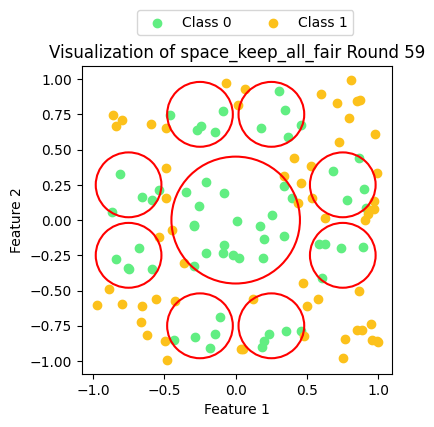

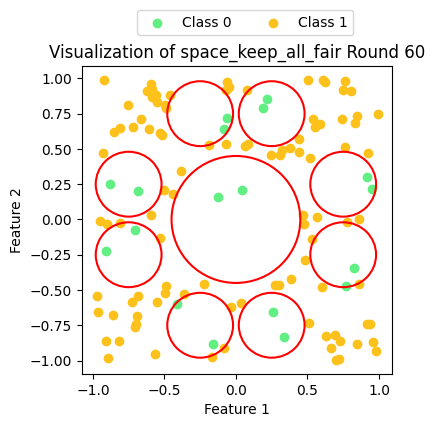

In [11]:
# visualize data imbalance rate IR change
#
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
# read_data_base_path = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_start_change60/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_start_change60/space_keep_all/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_fairstart_change60/space_keep_all_fair/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_unfairstart_change60/space_keep_all_fair/'
read_data_base_path = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_unfairstart_change60/'
setting_names = ['space_keep_all','space_keep_notA1','space_keepA1','space_keep_A3579','space_keep_A9','frequency_10_Afair','frequency_10','space_keep_all_fair']
# [79,80]
rounds = [59,60]
# color_list = ['#614e82','#3f0457','#ff00ff','#8c008c','#2f9e2b','#7e21ce','#ff2f30','#3ea024','#7984c4']
# # 可视化数据
# plt.figure(figsize=(8, 8))
# for i in range(1, 10):
#     plt.scatter(x[classes == f'A{i}'], y[classes == f'A{i}'],c=color_list[i-1], label=f'Class A{i}')
# plt.scatter(x[classes == 'B'], y[classes == 'B'], color='#fcc11b', label='Class B')
color_list = ['#61ee82','#fcc11b']
def visualize_data(setting_name=setting_names[0], round=rounds[0], folder=read_data_base_path):
    file_path = os.path.join(folder, setting_name, f'round_{round}.csv')
    data = pd.read_csv(file_path, header=None)
    data = data.iloc[1:]  # 排除标题行

    # 提取特征和目标变量
    raw_X = data.iloc[:, :2].astype(float).values  # 特征
    raw_y = data.iloc[:, -1].astype(float).astype(int).values  # 目标变量

    # 创建一个散点图
    fig, ax = plt.subplots(figsize=(4, 4))
    for label in np.unique(raw_y):
        color = color_list[label % len(color_list)]
        ax.scatter(raw_X[raw_y == label, 0], raw_X[raw_y == label, 1],color = color, label=f'Class {label}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Visualization of {setting_name} Round {round}')

    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),(-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8
    # 绘制圆形边框
    for center, radius in zip(circle_centers, radii):
        circle = Circle(center, radius, edgecolor='red', facecolor='none', linewidth=1.5)
        ax.add_patch(circle)
    plt.legend(loc=(0.18,1.1),ncol =2)
    plt.show()
# ['space_keep_all','space_keep_notA1','space_keepA1','space_keep_A1357','space_keep_A9']
# balanced start
# set_id = 0
# set_id = 1
# set_id = 2
# set_id = 3
# set_id = 4
# imbalanced start
# set_id = 0
# set_id = 1
# set_id = 2
# set_id = 3
set_id = 7
visualize_data(setting_name=setting_names[set_id], round=rounds[0])
visualize_data(setting_name=setting_names[set_id], round=rounds[1])


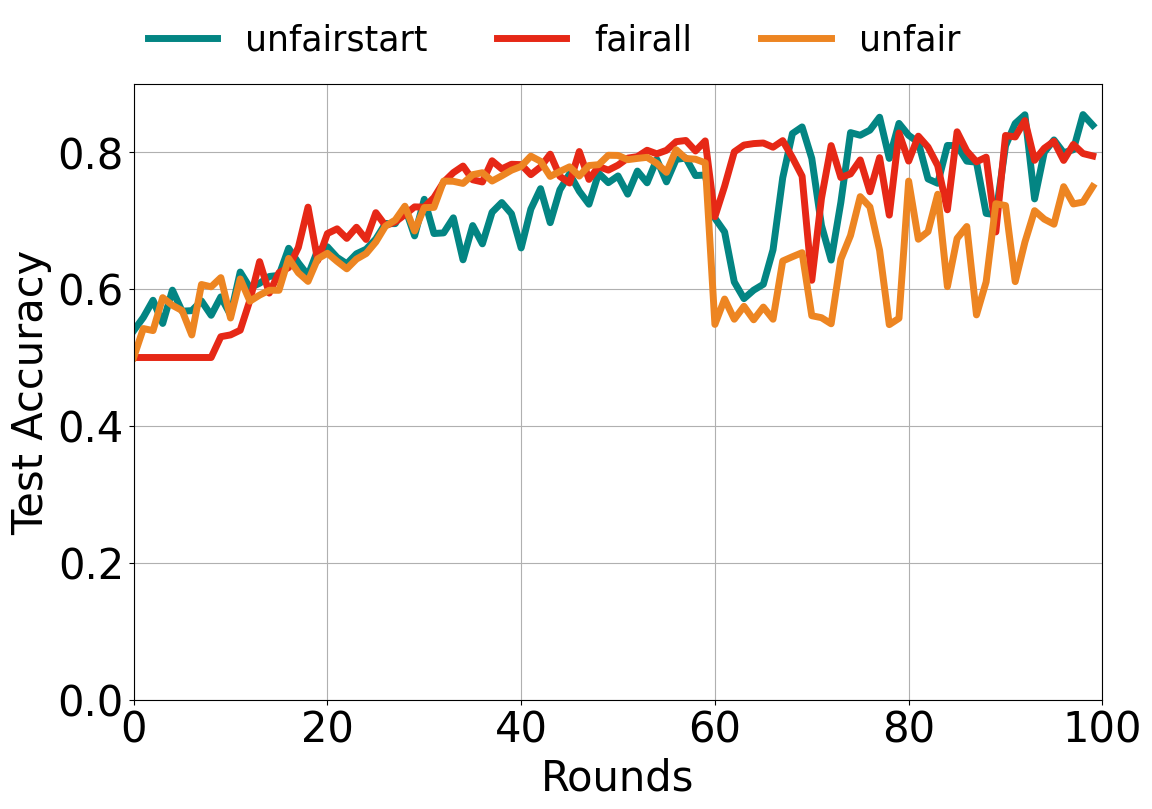

In [16]:
# 实验1.
# 所有客户都端的
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_start_change60/space_keep_all/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_fairstart_change60/space_keep_all_fair/'
# output_dir = 'E:/FedStream/data_set_syn/Synthetic0310/2Dim_9A1B/single_Balanced_unfairstart_change60/space_keep_all_fair/'
base = 'E:/FedStream/metrics/2Dim_9A1B/'
read_metrics_path = 'E:/FedStream/metrics/2Dim_9A1B/single_Balanced_unfairstart_change60'
# read_metrics_path = 'E:/FedStream/metrics/2Dim_9A1B/single_Balanced_start_change60'
# space_keep_all_200_mlp4
# setting_names = ['space_keep_all','space_keep_notA1','space_keepA1','space_keep_A1357','space_keep_A9']
# setting_names='space_keep_all'
# setting_names='space_keep_notA1'
# setting_names = 'space_keepA1'
# setting_names = 'space_keep_A1357'
# setting_names ='space_keep_A9'
# - imbalanced
# setting_names='space_keep_all'
# setting_names='space_keep_notA1'
# setting_names = 'space_keepA1'
# setting_names = 'space_keep_A3579'
# setting_names ='space_keep_A9'
# setting_names='frequency_10'
# setting_names='frequency_10_Afair'
setting_names='space_keep_all'
readPath = [os.path.join(base,'single_Balanced_unfairstart_change60'),os.path.join(base,'single_Balanced_fairstart_change60'),os.path.join(base,'single_Balanced_start_change60')]
label_list = ['unfairstart','fairall','unfair']
analysis_list = ['accuracy','f1_score_0','f1_score_1'] # ,'auc','g_mean',
color_list = ['#038583','#e62816','#ed8522','#603076','#394793','tab:green', 'tab:purple', 'tab:cyan','#FF5200']
fig, ax = plt.subplots(figsize=(12.5, 8))

for i, path in enumerate(readPath):
    # E:\FedStream\metrics\elecNorm_Sampling\FedNova_kvalue30\Electricity_client_random\CondensedNearestNeighbour_epoch400_hidden2lyer
    metric_path = os.path.join(path,f'{setting_names}_200_mlp4',f'{setting_names}_metrics.csv')
    df = pd.read_csv(metric_path)

    grouped_data = df.groupby('rounds')['accuracy'].mean()
    rounds = grouped_data.index.values
    mean_accuracy = grouped_data.values
    ax.plot(rounds, mean_accuracy,color=color_list[i], label=f'{label_list[i]}',linewidth = 5)
ax.set_xlim([0, 100])
ax.set_ylim([0.0, 0.9])
ax.margins(x=0, y=0)
ax.set_xlabel('Rounds', fontsize=30)
ax.set_ylabel('Test Accuracy', fontsize=30)
# 修改x轴和y轴的标尺字体大小
ax.tick_params(axis='x', labelsize=30)  # 设置x轴标尺字体大小为16
ax.tick_params(axis='y', labelsize=30)  # 设置y轴标尺字体大小为16
# 显示图例和网格线, frameon=False去除外边框
#ax.legend(loc=(0.0,1.02),fontsize=16, frameon=False, ncol=len(label_list)*1.5)
ax.legend(loc =(0,1.02),fontsize=25, frameon=False,ncol=3)
ax.grid(True)
plt.show()

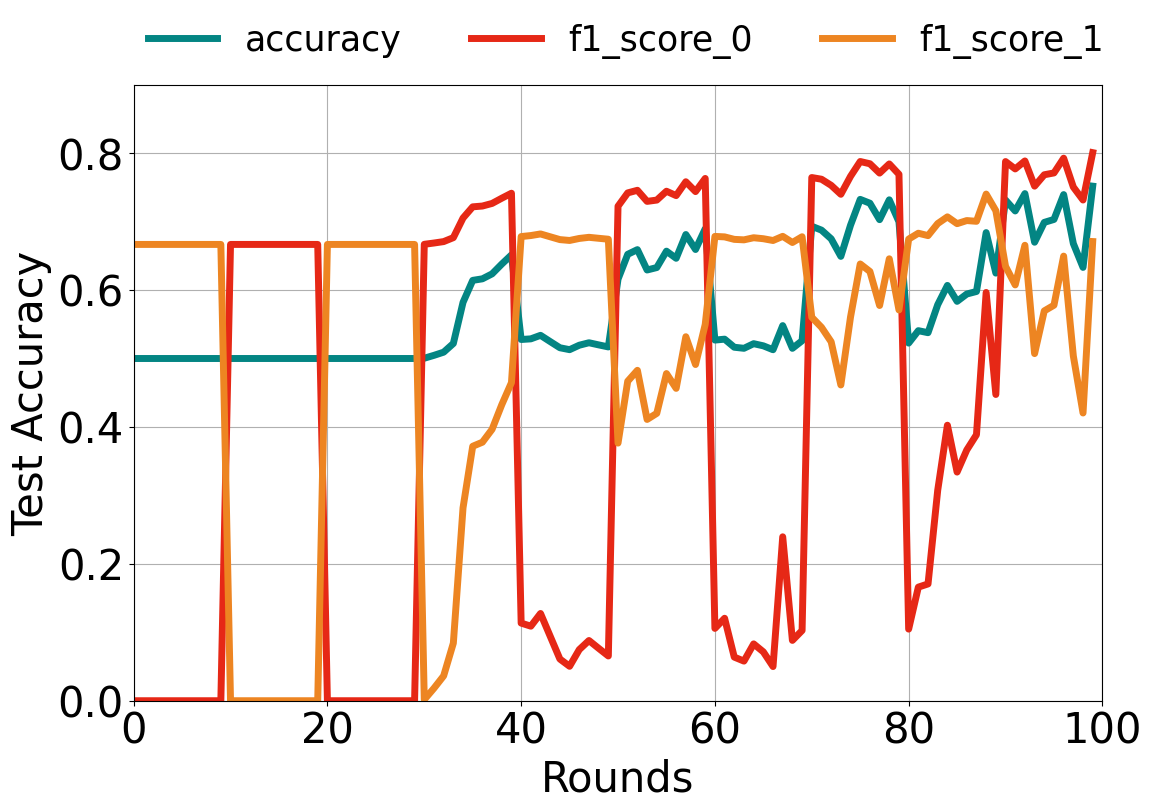

In [1]:
# 实验1.
# 所有客户都端的
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
read_metrics_path = 'E:/FedStream/metrics/2Dim_9A1B/single_imBalanced_start_change60'
# read_metrics_path = 'E:/FedStream/metrics/2Dim_9A1B/single_Balanced_start_change60'
# space_keep_all_200_mlp4
# setting_names = ['space_keep_all','space_keep_notA1','space_keepA1','space_keep_A1357','space_keep_A9']
# setting_names='space_keep_all'
# setting_names='space_keep_notA1'
# setting_names = 'space_keepA1'
# setting_names = 'space_keep_A1357'
# setting_names ='space_keep_A9'
# - imbalanced
# setting_names='space_keep_all'
# setting_names='space_keep_notA1'
# setting_names = 'space_keepA1'
# setting_names = 'space_keep_A3579'
# setting_names ='space_keep_A9'
setting_names='frequency_10'
analysis_list = ['accuracy','f1_score_0','f1_score_1'] # ,'auc','g_mean',
color_list = ['#038583','#e62816','#ed8522','#603076','#394793','tab:green', 'tab:purple', 'tab:cyan','#FF5200']
fig, ax = plt.subplots(figsize=(12.5, 8))

for i, analysis in enumerate(analysis_list):
    # E:\FedStream\metrics\elecNorm_Sampling\FedNova_kvalue30\Electricity_client_random\CondensedNearestNeighbour_epoch400_hidden2lyer
    metric_path = os.path.join(read_metrics_path,f'{setting_names}_200_mlp4',f'{setting_names}_metrics.csv')
    df = pd.read_csv(metric_path)

    grouped_data = df.groupby('rounds')[analysis].mean()
    rounds = grouped_data.index.values
    mean_accuracy = grouped_data.values
    ax.plot(rounds, mean_accuracy,color=color_list[i], label=f'{analysis}',linewidth = 5)
ax.set_xlim([0, 100])
ax.set_ylim([0.0, 0.9])
ax.margins(x=0, y=0)
ax.set_xlabel('Rounds', fontsize=30)
ax.set_ylabel('Test Accuracy', fontsize=30)
# 修改x轴和y轴的标尺字体大小
ax.tick_params(axis='x', labelsize=30)  # 设置x轴标尺字体大小为16
ax.tick_params(axis='y', labelsize=30)  # 设置y轴标尺字体大小为16
# 显示图例和网格线, frameon=False去除外边框
#ax.legend(loc=(0.0,1.02),fontsize=16, frameon=False, ncol=len(label_list)*1.5)
ax.legend(loc =(0,1.02),fontsize=25, frameon=False,ncol=3)
ax.grid(True)
plt.show()

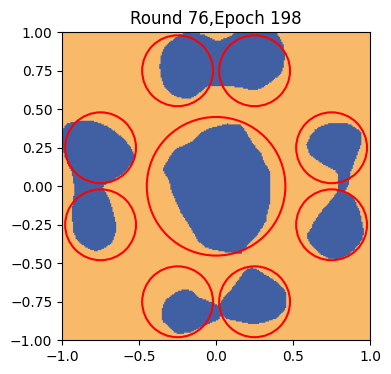

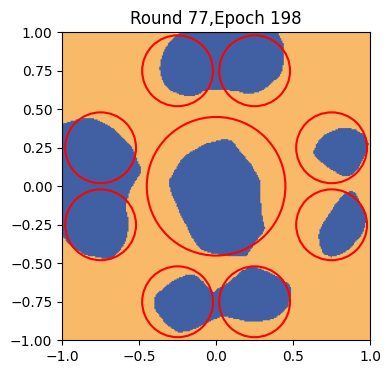

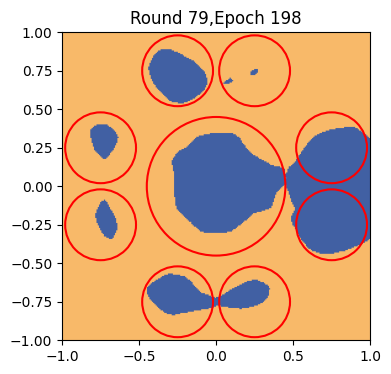

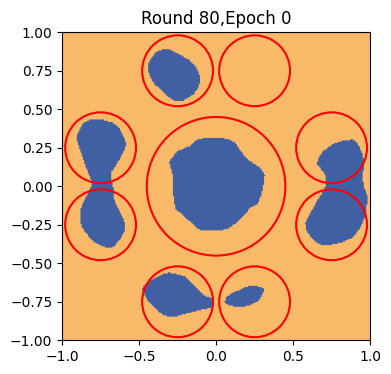

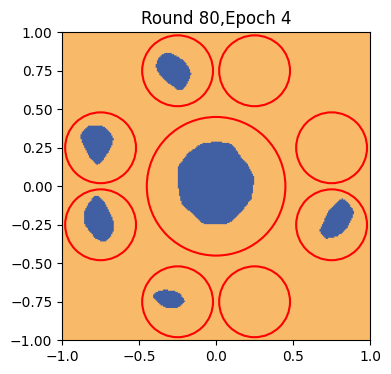

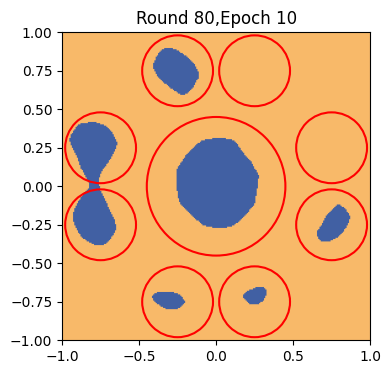

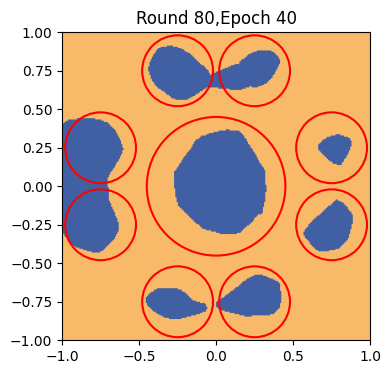

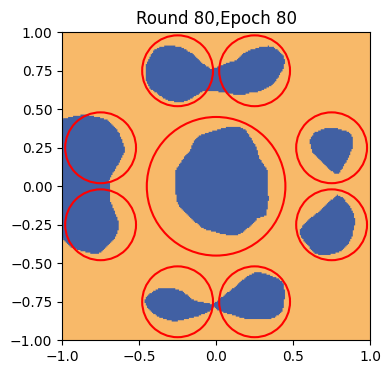

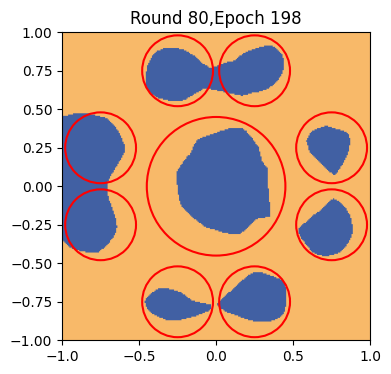

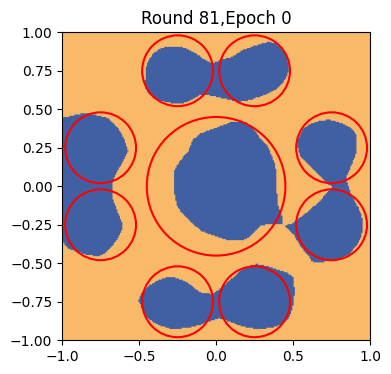

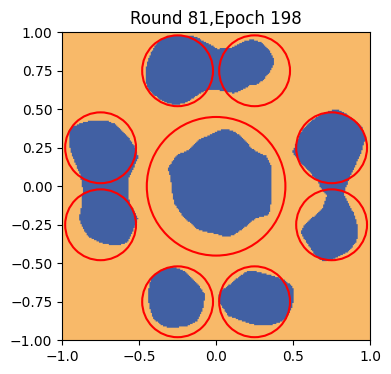

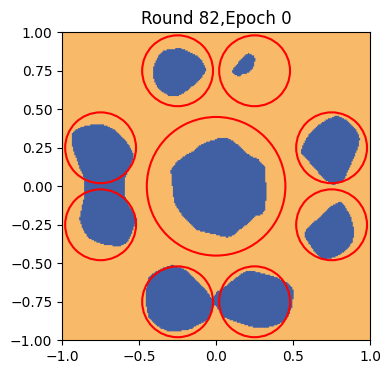

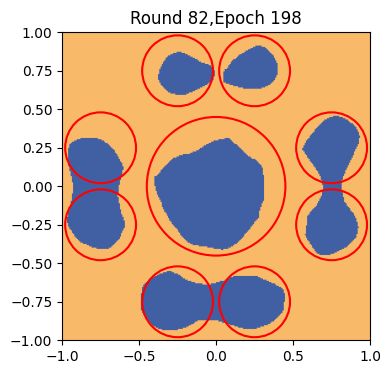

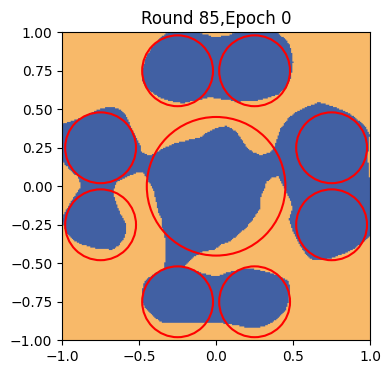

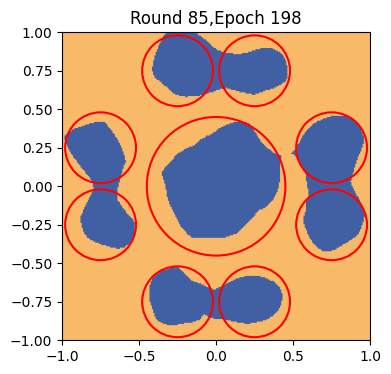

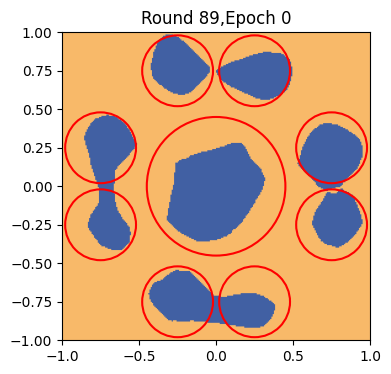

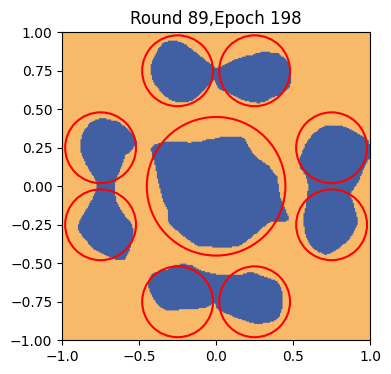

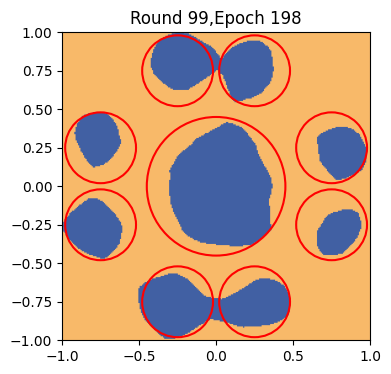

In [10]:
# 可视化分类结果的函数
import os
import copy
from sklearn.utils import shuffle
from sklearn.metrics import f1_score,recall_score, accuracy_score, roc_auc_score,cohen_kappa_score,confusion_matrix,precision_score
from sklearn.preprocessing import LabelBinarizer
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
def visualize_model(model, grid_data, roundx, epoch,setting_name,index):
    model.eval()
    with torch.no_grad():
        grid_outputs = model(grid_data)
        _, grid_predicted = torch.max(grid_outputs, 1)
        grid_predicted = grid_predicted.reshape(250, 250).numpy()

    # 自定义颜色映射
    colors = ['#4160a3', '#f8b969']  # colors[0] for 0, colors[1] for 1
    custom_cmap = ListedColormap(colors)

    # 创建一个空画布，使用 grid_predicted 的值确定颜色
    canvas = np.zeros((250, 250, 3), dtype=np.uint8)
    for i in range(250):
        for j in range(250):
            if grid_predicted[i, j] == 0:
                canvas[i, j] = [65, 96, 163]  # RGB for '#4160a3'
            elif grid_predicted[i, j] == 1:
                canvas[i, j] = [248, 185, 105]  # RGB for '#f8b969'

    # 使用 imshow 显示画布
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(canvas, extent=(-1, 1, -1, 1), origin='lower')

    #plt.colorbar(cax, ax=ax, boundaries=[0, 1, 2], ticks=[0, 1])
    plt.title(f'Round {roundx},Epoch {epoch}')
    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),(-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8
    # 绘制圆形边框
    for center, radius in zip(circle_centers, radii):
        circle = Circle(center, radius, edgecolor='red', facecolor='none', linewidth=1.5)
        ax.add_patch(circle)
    plt.savefig(f'C:/Users/张腾森/Desktop/modelV/imbalanced_start/unfair_{setting_name}/{index}output.png')
    plt.show()
def print_model_details(model):
    print("Model class:", model.__class__.__name__)
    print("Model structure:", model)

class MLP4(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP4, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc3 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc4 = nn.Linear(hidden_size*2, hidden_size)
        self.fc5 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        return x
# 读取模型
def load_model(model_path):
    model = torch.load(model_path)
    return model

def print_model(round_id,epoch_id,setting_name,index):
    # 创建网格数据
    grid_x, grid_y = np.meshgrid(np.linspace(-1, 1, 250), np.linspace(-1, 1, 250))
    grid_data = np.column_stack((grid_x.ravel(), grid_y.ravel()))
    grid_data = torch.tensor(grid_data, dtype=torch.float32)
    # 读取模型文件
    # model_path = f'E:/FedStream/models/2Dim_9A1B/single_Balanced_start_change60/{setting_name}_200_mlp4/round_{round_id}/epoch_{epoch_id}.pt'
    # read_metrics_path = 'E:/FedStream/metrics/2Dim_9A1B/single_Balanced_fairstart_change60'
    model_path = f'E:/FedStream/models/2Dim_9A1B/single_Balanced_fairstart_change60/{setting_name}_200_mlp4/round_{round_id}/epoch_{epoch_id}.pt'
    model = load_model(model_path)
    visualize_model(model, grid_data,roundx = round_id,epoch=epoch_id,setting_name=setting_name,index = index)
    return index+1
# setting_names = ['space_keep_all','space_keep_notA1','space_keepA1','space_keep_A1357','space_keep_A9']
# setting_name = 'space_keep_all'
# setting_name = 'space_keep_notA1'
# setting_name = 'space_keepA1'
# setting_name = 'space_keep_A1357'
# setting_name = 'space_keep_A9'
# setting_names = ['space_keep_all','space_keep_notA1','space_keepA1','space_keep_A3579','space_keep_A9']
# setting_name = 'space_keep_all'
# setting_name = 'space_keep_notA1'
# setting_name = 'space_keepA1'
# setting_name = 'space_keep_A3579'
# setting_name = 'space_keep_A9'
# setting_name='frequency_10'
setting_name='space_keep_all_fair'
index = 1
index =print_model(round_id=76,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=77,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=79,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=4,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=10,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=40,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=80,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=81,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=81,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=82,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=82,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=85,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=85,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=89,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=89,epoch_id=198,setting_name=setting_name,index = index)
# print_model(round_id=59,epoch_id=198,setting_name=setting_name,index = index)
# index += 1
# for i in range(8,9):
#     print_model(round_id=i*10-1,epoch_id=198,setting_name=setting_name,index = index)
#     index+=1
#     print_model(round_id=i*10,epoch_id=0,setting_name=setting_name,index = index)
#     index+=1
#     print_model(round_id=i*10,epoch_id=4,setting_name=setting_name,index = index)
#     index+=1
#     print_model(round_id=i*10,epoch_id=8,setting_name=setting_name,index = index)
#     index+=1
#     print_model(round_id=i*10,epoch_id=198,setting_name=setting_name,index = index)
#     index+=1
# for i in range(4):
#     print_model(round_id=60,epoch_id=(i+1)*20,setting_name=setting_name,index = index)
#     index+=1
# print_model(round_id=60,epoch_id=198,setting_name=setting_name,index = index)
# index+=1
# print_model(round_id=70,epoch_id=198,setting_name=setting_name,index = index)
# index+=1
index =print_model(round_id=99,epoch_id=198,setting_name=setting_name,index = index)

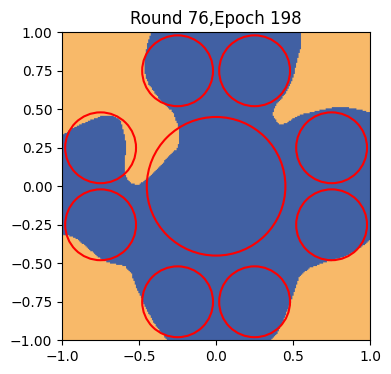

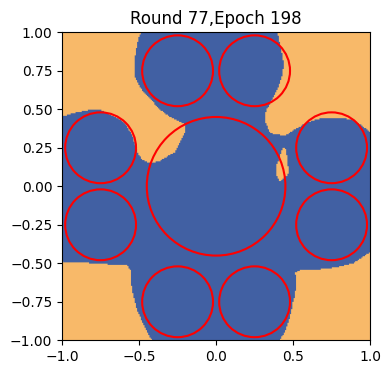

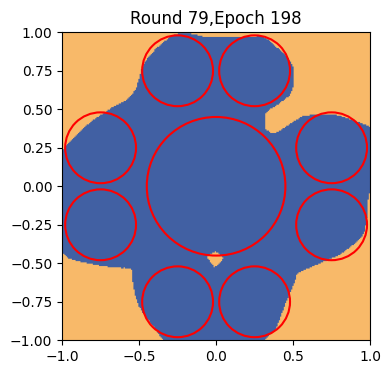

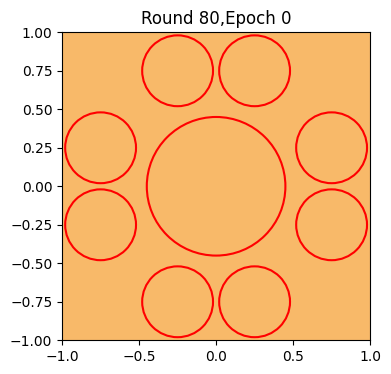

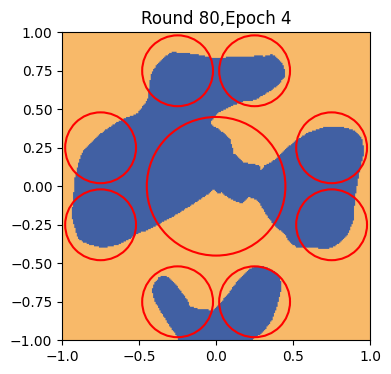

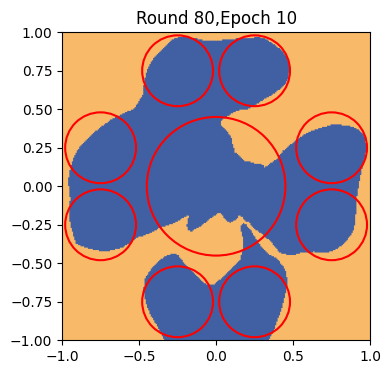

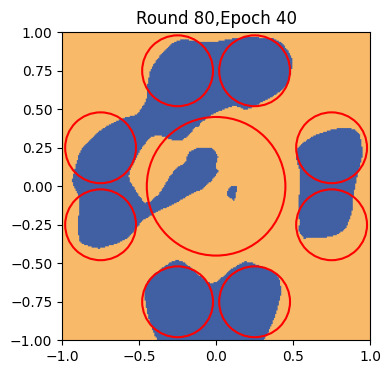

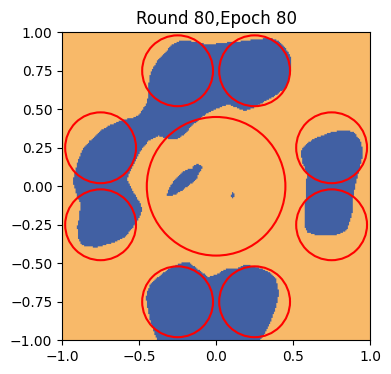

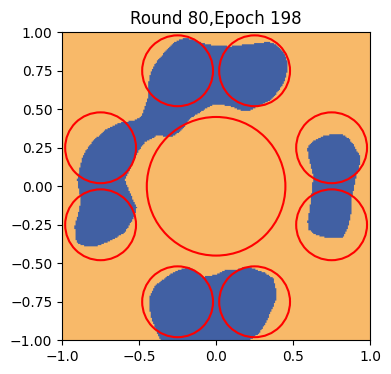

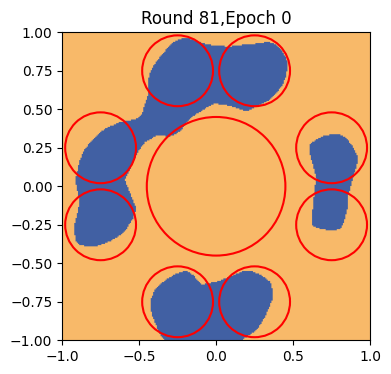

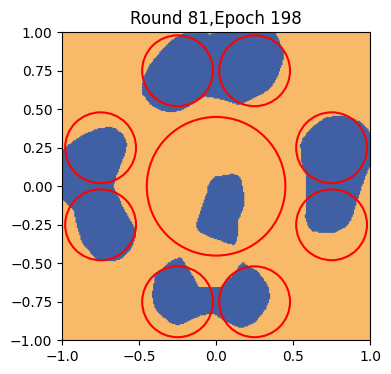

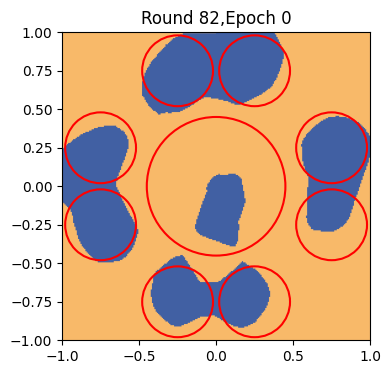

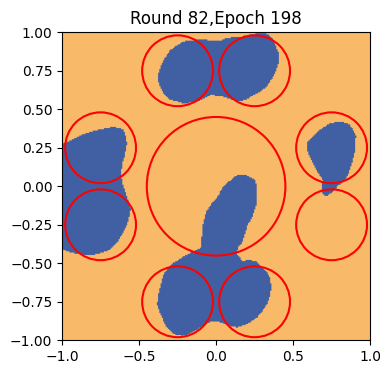

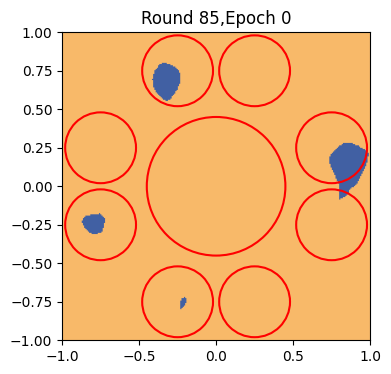

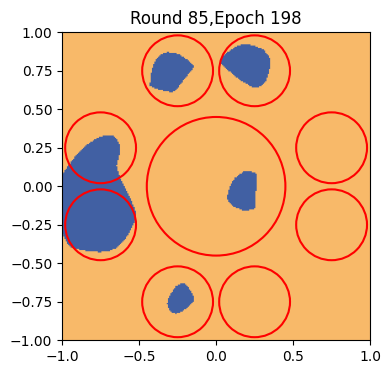

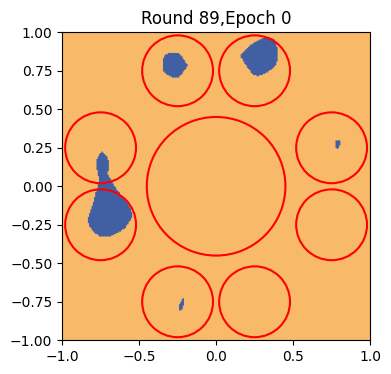

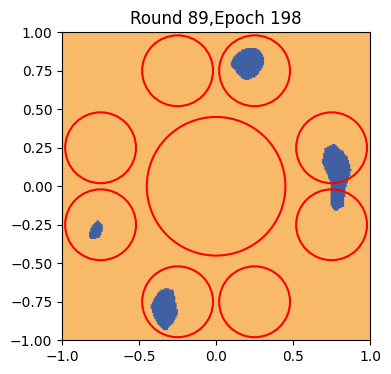

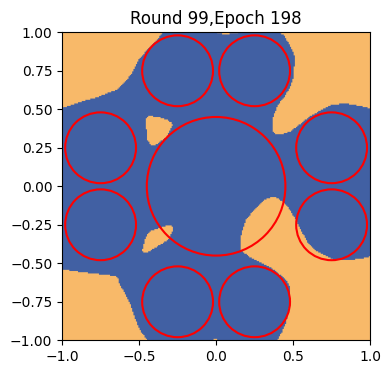

In [24]:
# 可视化分类结果的函数
import os
import copy
from sklearn.utils import shuffle
from sklearn.metrics import f1_score,recall_score, accuracy_score, roc_auc_score,cohen_kappa_score,confusion_matrix,precision_score
from sklearn.preprocessing import LabelBinarizer
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
def visualize_model(model, grid_data, roundx, epoch,setting_name,index):
    model.eval()
    with torch.no_grad():
        grid_outputs = model(grid_data)
        _, grid_predicted = torch.max(grid_outputs, 1)
        grid_predicted = grid_predicted.reshape(250, 250).numpy()

    # 自定义颜色映射
    colors = ['#4160a3', '#f8b969']  # colors[0] for 0, colors[1] for 1
    custom_cmap = ListedColormap(colors)

    # 创建一个空画布，使用 grid_predicted 的值确定颜色
    canvas = np.zeros((250, 250, 3), dtype=np.uint8)
    for i in range(250):
        for j in range(250):
            if grid_predicted[i, j] == 0:
                canvas[i, j] = [65, 96, 163]  # RGB for '#4160a3'
            elif grid_predicted[i, j] == 1:
                canvas[i, j] = [248, 185, 105]  # RGB for '#f8b969'

    # 使用 imshow 显示画布
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(canvas, extent=(-1, 1, -1, 1), origin='lower')

    #plt.colorbar(cax, ax=ax, boundaries=[0, 1, 2], ticks=[0, 1])
    plt.title(f'Round {roundx},Epoch {epoch}')
    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),(-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8
    # 绘制圆形边框
    for center, radius in zip(circle_centers, radii):
        circle = Circle(center, radius, edgecolor='red', facecolor='none', linewidth=1.5)
        ax.add_patch(circle)
    plt.savefig(f'C:/Users/张腾森/Desktop/modelV/imbalanced_start/{setting_name}/{index}output.png')
    plt.show()
def print_model_details(model):
    print("Model class:", model.__class__.__name__)
    print("Model structure:", model)

class MLP4(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP4, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc3 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc4 = nn.Linear(hidden_size*2, hidden_size)
        self.fc5 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        return x
# 读取模型
def load_model(model_path):
    model = torch.load(model_path)
    return model

def print_model(round_id,epoch_id,setting_name,index):
    # 创建网格数据
    grid_x, grid_y = np.meshgrid(np.linspace(-1, 1, 250), np.linspace(-1, 1, 250))
    grid_data = np.column_stack((grid_x.ravel(), grid_y.ravel()))
    grid_data = torch.tensor(grid_data, dtype=torch.float32)
    # 读取模型文件
    # model_path = f'E:/FedStream/models/2Dim_9A1B/single_Balanced_start_change60/{setting_name}_200_mlp4/round_{round_id}/epoch_{epoch_id}.pt'
    model_path = f'E:/FedStream/models/2Dim_9A1B/single_imBalanced_start_change60/{setting_name}_200_mlp4/round_{round_id}/epoch_{epoch_id}.pt'
    model = load_model(model_path)
    visualize_model(model, grid_data,roundx = round_id,epoch=epoch_id,setting_name=setting_name,index = index)
    return index+1
# setting_names = ['space_keep_all','space_keep_notA1','space_keepA1','space_keep_A1357','space_keep_A9']
# setting_name = 'space_keep_all'
# setting_name = 'space_keep_notA1'
# setting_name = 'space_keepA1'
# setting_name = 'space_keep_A1357'
# setting_name = 'space_keep_A9'
# setting_names = ['space_keep_all','space_keep_notA1','space_keepA1','space_keep_A3579','space_keep_A9']
# setting_name = 'space_keep_all'
# setting_name = 'space_keep_notA1'
# setting_name = 'space_keepA1'
# setting_name = 'space_keep_A3579'
# setting_name = 'space_keep_A9'
setting_name='frequency_10_Afair'# 'frequency_10'
index = 1
index =print_model(round_id=76,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=77,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=79,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=4,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=10,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=40,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=80,setting_name=setting_name,index = index)
index =print_model(round_id=80,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=81,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=81,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=82,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=82,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=85,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=85,epoch_id=198,setting_name=setting_name,index = index)
index =print_model(round_id=89,epoch_id=0,setting_name=setting_name,index = index)
index =print_model(round_id=89,epoch_id=198,setting_name=setting_name,index = index)
# print_model(round_id=59,epoch_id=198,setting_name=setting_name,index = index)
# index += 1
# for i in range(8,9):
#     print_model(round_id=i*10-1,epoch_id=198,setting_name=setting_name,index = index)
#     index+=1
#     print_model(round_id=i*10,epoch_id=0,setting_name=setting_name,index = index)
#     index+=1
#     print_model(round_id=i*10,epoch_id=4,setting_name=setting_name,index = index)
#     index+=1
#     print_model(round_id=i*10,epoch_id=8,setting_name=setting_name,index = index)
#     index+=1
#     print_model(round_id=i*10,epoch_id=198,setting_name=setting_name,index = index)
#     index+=1
# for i in range(4):
#     print_model(round_id=60,epoch_id=(i+1)*20,setting_name=setting_name,index = index)
#     index+=1
# print_model(round_id=60,epoch_id=198,setting_name=setting_name,index = index)
# index+=1
# print_model(round_id=70,epoch_id=198,setting_name=setting_name,index = index)
# index+=1
index =print_model(round_id=99,epoch_id=198,setting_name=setting_name,index = index)
# index+=1

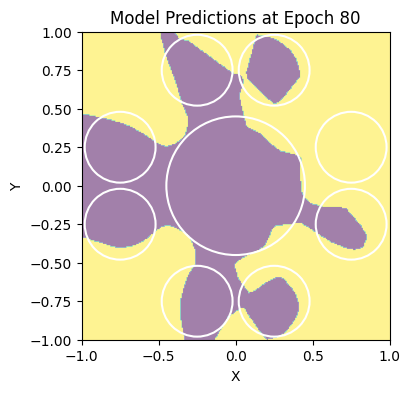

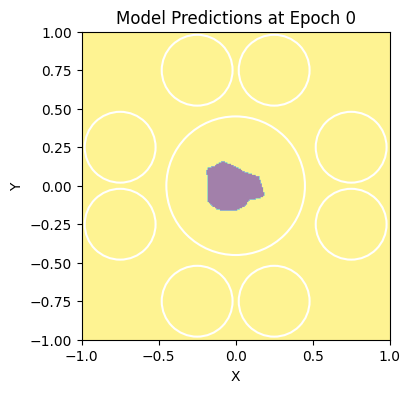

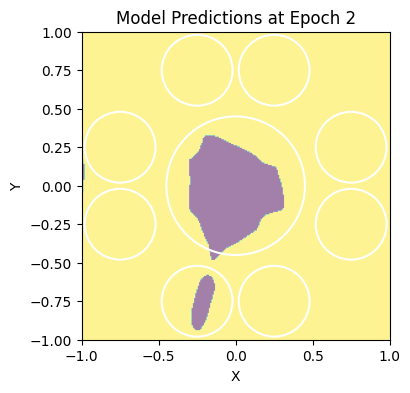

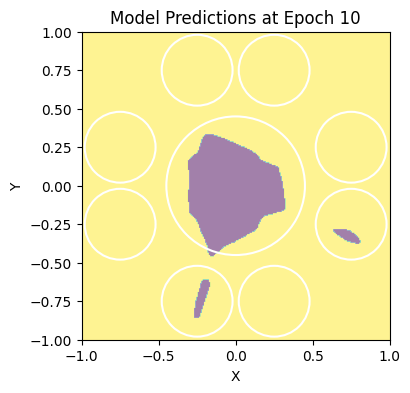

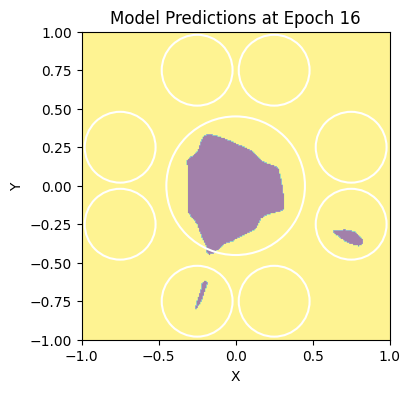

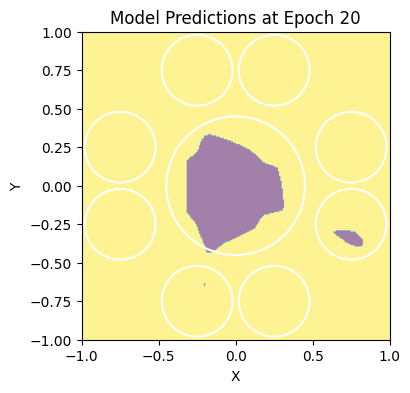

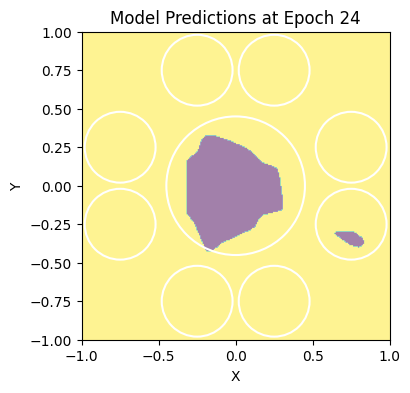

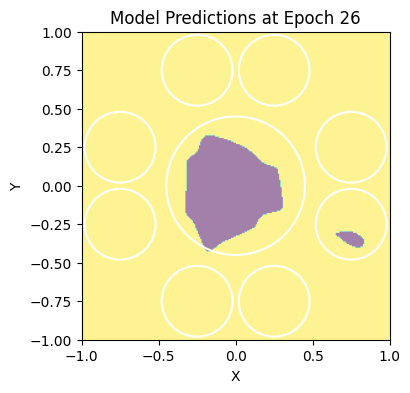

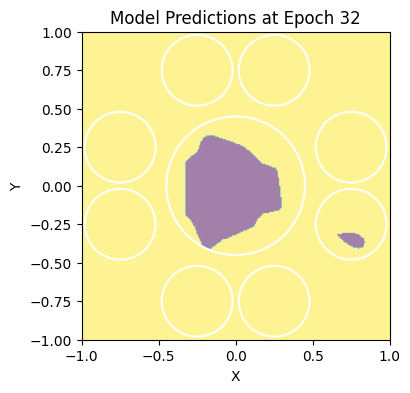

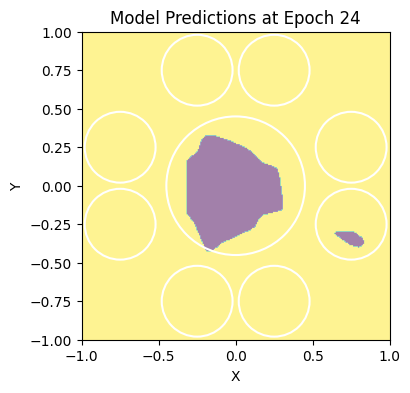

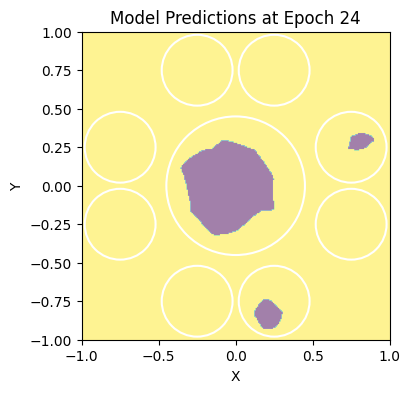

In [124]:
# 可视化分类结果的函数
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
def visualize_model(model, grid_data, epoch):
    model.eval()
    with torch.no_grad():
        grid_outputs = model(grid_data)
        _, grid_predicted = torch.max(grid_outputs, 1)
        grid_predicted = grid_predicted.reshape(250, 250)

    fig, ax = plt.subplots(figsize=(4, 4))
    cax = ax.imshow(grid_predicted, extent=(-1, 1, -1, 1), origin='lower', cmap='viridis', alpha=0.5)
    # plt.colorbar(cax)
    plt.title(f'Model Predictions at Epoch {epoch}')
    plt.xlabel('X')
    plt.ylabel('Y')
    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),(-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8
    # 绘制圆形边框
    for center, radius in zip(circle_centers, radii):
        circle = Circle(center, radius, edgecolor='white', facecolor='none', linewidth=1.5)
        ax.add_patch(circle)

    plt.show()
def print_model_details(model):
    print("Model class:", model.__class__.__name__)
    print("Model structure:", model)

class MLPxx(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPxx, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size*2, hidden_size*2)
        self.fc3= nn.Linear(hidden_size*2, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x
# 读取模型
def load_model(model_path):
    model = torch.load(model_path)
    return model

def print_model(round_id,epoch_id):
    # 创建网格数据
    grid_x, grid_y = np.meshgrid(np.linspace(-1, 1, 250), np.linspace(-1, 1, 250))
    grid_data = np.column_stack((grid_x.ravel(), grid_y.ravel()))
    grid_data = torch.tensor(grid_data, dtype=torch.float32)
    # 读取模型文件
    model_path = f'E:/FedStream/models/2Dim_9A1B/single_Balanced_start_change60/space_keep_all_200_mlp3/round_{round_id}/epoch_{epoch_id}.pt'
    model = load_model(model_path)
    visualize_model(model, grid_data,epoch=epoch_id)

print_model(round_id=59,epoch_id=80)
print_model(round_id=60,epoch_id=0)
print_model(round_id=60,epoch_id=2)
print_model(round_id=60,epoch_id=10)
print_model(round_id=60,epoch_id=16)
print_model(round_id=60,epoch_id=20)
print_model(round_id=60,epoch_id=24)
print_model(round_id=60,epoch_id=26)
print_model(round_id=60,epoch_id=32)
print_model(round_id=60,epoch_id=24)
print_model(round_id=99,epoch_id=24)

In [ ]:
# 可视化分类结果的函数
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import ListedColormap, BoundaryNorm
def visualize_model(model, grid_data, epoch):
    model.eval()
    with torch.no_grad():
        grid_outputs = model(grid_data)
        _, grid_predicted = torch.max(grid_outputs, 1)
        grid_predicted = grid_predicted.reshape(250, 250)

    fig, ax = plt.subplots(figsize=(4, 4))
    cax = ax.imshow(grid_predicted, extent=(-1, 1, -1, 1), origin='lower', cmap='viridis', alpha=0.5)
    # plt.colorbar(cax)
    plt.title(f'Model Predictions at Epoch {epoch}')
    plt.xlabel('X')
    plt.ylabel('Y')
    circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),(-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
    radii = [0.45] + [0.23] * 8
    # 绘制圆形边框
    for center, radius in zip(circle_centers, radii):
        circle = Circle(center, radius, edgecolor='white', facecolor='none', linewidth=1.5)
        ax.add_patch(circle)

    plt.show()
def print_model_details(model):
    print("Model class:", model.__class__.__name__)
    print("Model structure:", model)

# class MLPxx(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MLPxx, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size*2)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size*2, hidden_size*2)
#         self.fc3= nn.Linear(hidden_size*2, hidden_size)
#         self.fc4 = nn.Linear(hidden_size, output_size)
#
#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         x = self.relu(x)
#         x = self.fc3(x)
#         x = self.relu(x)
#         x = self.fc4(x)
#         return x
# 读取模型
def load_model(model_path):
    model = torch.load(model_path)
    # print(model.load_state_dict)
    return model

def print_model(round_id,epoch_id):
    # 创建网格数据
    grid_x, grid_y = np.meshgrid(np.linspace(-1, 1, 250), np.linspace(-1, 1, 250))
    grid_data = np.column_stack((grid_x.ravel(), grid_y.ravel()))
    grid_data = torch.tensor(grid_data, dtype=torch.float32)
    # 读取模型文件
    model_path = f'E:/FedStream/models/2Dim_9A1B/single_Balanced_start_change60/space_keep_all_200_mlp4/round_{round_id}/epoch_{epoch_id}.pt'
    model = load_model(model_path)
    visualize_model(model, grid_data,epoch=epoch_id)

print_model(round_id=59,epoch_id=80)
print_model(round_id=60,epoch_id=0)
print_model(round_id=60,epoch_id=2)
print_model(round_id=60,epoch_id=10)
print_model(round_id=60,epoch_id=16)
print_model(round_id=60,epoch_id=20)
print_model(round_id=60,epoch_id=24)
print_model(round_id=60,epoch_id=26)
print_model(round_id=60,epoch_id=32)
print_model(round_id=60,epoch_id=24)
print_model(round_id=99,epoch_id=24)

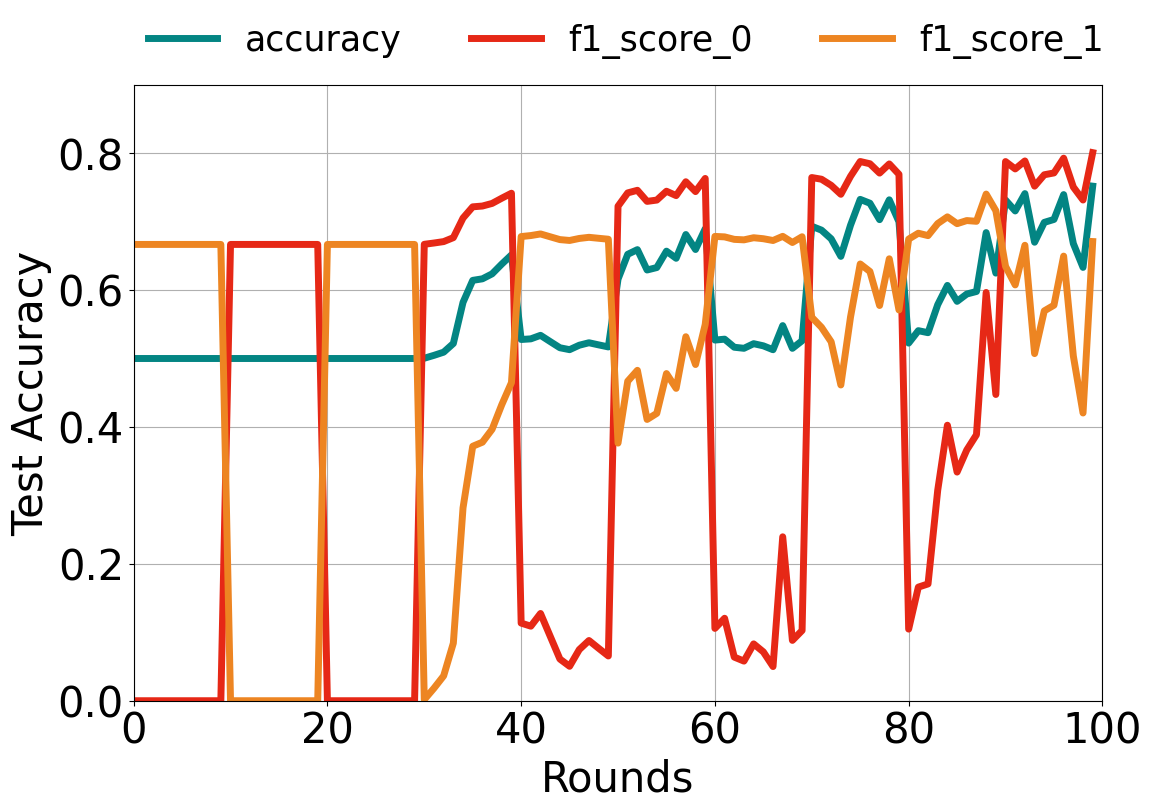

In [2]:
# 实验1.
# 所有客户都端的
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
read_metrics_path = 'E:/FedStream/metrics/2Dim_9A1B/single_imBalanced_start_change60'
# read_metrics_path = 'E:/FedStream/metrics/2Dim_9A1B/single_Balanced_start_change60'
# space_keep_all_200_mlp4
# setting_names = ['space_keep_all','space_keep_notA1','space_keepA1','space_keep_A1357','space_keep_A9']
# setting_names='space_keep_all'
# setting_names='space_keep_notA1'
# setting_names = 'space_keepA1'
# setting_names = 'space_keep_A1357'
# setting_names ='space_keep_A9'
# - imbalanced
# setting_names='space_keep_all'
# setting_names='space_keep_notA1'
# setting_names = 'space_keepA1'
# setting_names = 'space_keep_A3579'
# setting_names ='space_keep_A9'
setting_names='frequency_10'
analysis_list = ['accuracy','f1_score_0','f1_score_1'] # ,'auc','g_mean',
color_list = ['#038583','#e62816','#ed8522','#603076','#394793','tab:green', 'tab:purple', 'tab:cyan','#FF5200']
fig, ax = plt.subplots(figsize=(12.5, 8))

for i, analysis in enumerate(analysis_list):
    # E:\FedStream\metrics\elecNorm_Sampling\FedNova_kvalue30\Electricity_client_random\CondensedNearestNeighbour_epoch400_hidden2lyer
    metric_path = os.path.join(read_metrics_path,f'{setting_names}_200_mlp4',f'{setting_names}_metrics.csv')
    df = pd.read_csv(metric_path)

    grouped_data = df.groupby('rounds')[analysis].mean()
    rounds = grouped_data.index.values
    mean_accuracy = grouped_data.values
    ax.plot(rounds, mean_accuracy,color=color_list[i], label=f'{analysis}',linewidth = 5)
ax.set_xlim([0, 100])
ax.set_ylim([0.0, 0.9])
ax.margins(x=0, y=0)
ax.set_xlabel('Rounds', fontsize=30)
ax.set_ylabel('Test Accuracy', fontsize=30)
# 修改x轴和y轴的标尺字体大小
ax.tick_params(axis='x', labelsize=30)  # 设置x轴标尺字体大小为16
ax.tick_params(axis='y', labelsize=30)  # 设置y轴标尺字体大小为16
# 显示图例和网格线, frameon=False去除外边框
#ax.legend(loc=(0.0,1.02),fontsize=16, frameon=False, ncol=len(label_list)*1.5)
ax.legend(loc =(0,1.02),fontsize=25, frameon=False,ncol=3)
ax.grid(True)
plt.show()

In [ ]:
# # 可视化分类结果的函数
# import matplotlib.pyplot as plt
# from matplotlib.patches import Circle
# import torch
# import torch.nn as nn
# def visualize_model(model, grid_data, epoch):
#     model.eval()
#     with torch.no_grad():
#         grid_outputs = model(grid_data)
#         _, grid_predicted = torch.max(grid_outputs, 1)
#         grid_predicted = grid_predicted.reshape(250, 250)
#
#     fig, ax = plt.subplots(figsize=(4, 4))
#     cax = ax.imshow(grid_predicted, extent=(-1, 1, -1, 1), origin='lower', cmap='viridis', alpha=0.5)
#     # plt.colorbar(cax)
#     plt.title(f'Model Predictions at Epoch {epoch}')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     circle_centers = [(0, 0), (0.25, 0.75), (0.75, 0.25), (-0.25, 0.75), (-0.75, 0.25),(-0.25, -0.75), (-0.75, -0.25), (0.25, -0.75), (0.75, -0.25)]
#     radii = [0.45] + [0.23] * 8
#     # 绘制圆形边框
#     for center, radius in zip(circle_centers, radii):
#         circle = Circle(center, radius, edgecolor='white', facecolor='none', linewidth=1.5)
#         ax.add_patch(circle)
#
#     plt.show()
# def print_model_details(model):
#     print("Model class:", model.__class__.__name__)
#     print("Model structure:", model)
#
# class MLP4(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MLP4, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size*2)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size*2, hidden_size*2)
#         self.fc3 = nn.Linear(hidden_size*2, hidden_size*2)
#         self.fc4 = nn.Linear(hidden_size*2, hidden_size)
#         self.fc5 = nn.Linear(hidden_size, output_size)
#
#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         x = self.relu(x)
#         x = self.fc3(x)
#         x = self.relu(x)
#         x = self.fc4(x)
#         x = self.relu(x)
#         x = self.fc5(x)
#         return x
# # 读取模型
# def load_model(model_path):
#     model = torch.load(model_path)
#     return model
#
# def print_model(round_id,epoch_id):
#     # 创建网格数据
#     grid_x, grid_y = np.meshgrid(np.linspace(-1, 1, 250), np.linspace(-1, 1, 250))
#     grid_data = np.column_stack((grid_x.ravel(), grid_y.ravel()))
#     grid_data = torch.tensor(grid_data, dtype=torch.float32)
#     # 读取模型文件
#     model_path = f'E:/FedStream/models/2Dim_9A1B/single_imBalanced_start_change60/frequency_10_200_mlp4/round_{round_id}/epoch_{epoch_id}.pt'
#     model = load_model(model_path)
#     visualize_model(model, grid_data,epoch=epoch_id)
#
# print_model(round_id=79,epoch_id=198)
# print_model(round_id=80,epoch_id=0)
# print_model(round_id=80,epoch_id=2)
# print_model(round_id=80,epoch_id=4)
# print_model(round_id=80,epoch_id=6)
# print_model(round_id=80,epoch_id=8)
# print_model(round_id=80,epoch_id=10)
# print_model(round_id=80,epoch_id=20)
# print_model(round_id=80,epoch_id=98)
# print_model(round_id=80,epoch_id=198)
# print_model(round_id=81,epoch_id=0)
# print_model(round_id=81,epoch_id=2)
# print_model(round_id=85,epoch_id=0)
# print_model(round_id=85,epoch_id=2)
# print_model(round_id=85,epoch_id=198)
# print_model(round_id=89,epoch_id=0)
# print_model(round_id=89,epoch_id=198)
# print_model(round_id=90,epoch_id=0)